### LIBRARY IMPORTING


In [9]:
#GENERAL
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#PATH PROCESS
import os
from pathlib import Path
#IMAGE PROCESS
import cv2
#MACHINE LEARNING
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.models import Model, Sequential
from keras.layers import Reshape, Dense,Flatten, GaussianNoise
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

### PATH PROCESSING


In [2]:
Main_JPG_Data = Path("../images_gz2/images")
Main_JPG_Data

WindowsPath('../images_gz2/images')

In [3]:
JPG_Path = list(Main_JPG_Data.glob(r"*.jpg"))
JPG_Path

[WindowsPath('../images_gz2/images/100.jpg'),
 WindowsPath('../images_gz2/images/1000.jpg'),
 WindowsPath('../images_gz2/images/10000.jpg'),
 WindowsPath('../images_gz2/images/100000.jpg'),
 WindowsPath('../images_gz2/images/100001.jpg'),
 WindowsPath('../images_gz2/images/100002.jpg'),
 WindowsPath('../images_gz2/images/100003.jpg'),
 WindowsPath('../images_gz2/images/100004.jpg'),
 WindowsPath('../images_gz2/images/100005.jpg'),
 WindowsPath('../images_gz2/images/100006.jpg'),
 WindowsPath('../images_gz2/images/100007.jpg'),
 WindowsPath('../images_gz2/images/100008.jpg'),
 WindowsPath('../images_gz2/images/10001.jpg'),
 WindowsPath('../images_gz2/images/100010.jpg'),
 WindowsPath('../images_gz2/images/100011.jpg'),
 WindowsPath('../images_gz2/images/100012.jpg'),
 WindowsPath('../images_gz2/images/100013.jpg'),
 WindowsPath('../images_gz2/images/100014.jpg'),
 WindowsPath('../images_gz2/images/100015.jpg'),
 WindowsPath('../images_gz2/images/100016.jpg'),
 WindowsPath('../images_gz2

In [6]:
Another_JPG_Path = JPG_Path[121716:]
JPG_Path = JPG_Path[0:121716]

In [4]:
JPG_Path_Series = pd.Series(JPG_Path,name="JPG").astype(str)

In [5]:
print(JPG_Path_Series.head(-1))

0            ..\images_gz2\images\100.jpg
1           ..\images_gz2\images\1000.jpg
2          ..\images_gz2\images\10000.jpg
3         ..\images_gz2\images\100000.jpg
4         ..\images_gz2\images\100001.jpg
                       ...               
243428     ..\images_gz2\images\99994.jpg
243429     ..\images_gz2\images\99995.jpg
243430     ..\images_gz2\images\99996.jpg
243431     ..\images_gz2\images\99997.jpg
243432     ..\images_gz2\images\99998.jpg
Name: JPG, Length: 243433, dtype: object


In [9]:
Another_JPG_Path_Series = pd.Series(Another_JPG_Path,name="JPG").astype(str)

In [10]:
print(Another_JPG_Path_Series.head(-1))

0         ..\images_gz2\images\227251.jpg
1         ..\images_gz2\images\227252.jpg
2         ..\images_gz2\images\227253.jpg
3         ..\images_gz2\images\227254.jpg
4         ..\images_gz2\images\227255.jpg
                       ...               
121712     ..\images_gz2\images\99994.jpg
121713     ..\images_gz2\images\99995.jpg
121714     ..\images_gz2\images\99996.jpg
121715     ..\images_gz2\images\99997.jpg
121716     ..\images_gz2\images\99998.jpg
Name: JPG, Length: 121717, dtype: object


## VISUALIZATION

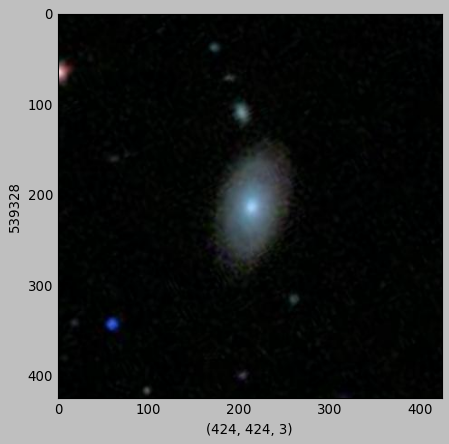

In [6]:
plt.style.use("classic")
Example_IMG = cv2.imread(JPG_Path_Series[2137])
plt.xlabel(Example_IMG.shape)
plt.ylabel(Example_IMG.size)
plt.imshow(Example_IMG)

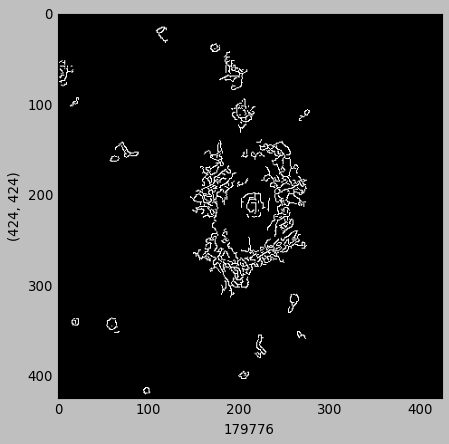

In [7]:
Example_IMG = cv2.imread(JPG_Path_Series[2137])
Canny_IMG = cv2.Canny(Example_IMG,5,80)
plt.xlabel(Canny_IMG.size)
plt.ylabel(Canny_IMG.shape)
plt.imshow(Canny_IMG,cmap="Greys_r")

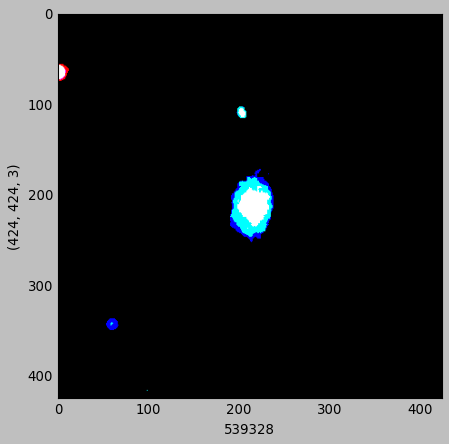

In [8]:
Example_IMG = cv2.imread(JPG_Path_Series[2137])
_,Thresh_IMG = cv2.threshold(Example_IMG,90,255,cv2.THRESH_BINARY)
plt.xlabel(Thresh_IMG.size)
plt.ylabel(Thresh_IMG.shape)
plt.imshow(Thresh_IMG,cmap="Greys_r")

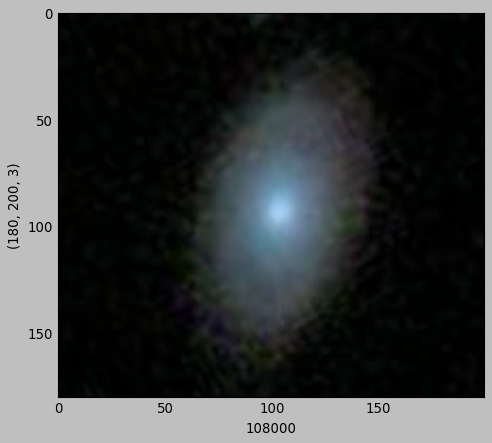

In [9]:
Example_IMG = cv2.imread(JPG_Path_Series[2137])
Cut_Example_IMG = Example_IMG[120:300,110:310]
plt.xlabel(Cut_Example_IMG.size)
plt.ylabel(Cut_Example_IMG.shape)
plt.imshow(Cut_Example_IMG)

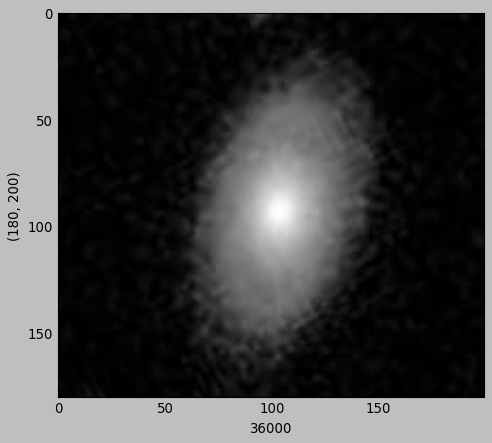

In [10]:
Example_IMG = cv2.imread(JPG_Path_Series[2137],0)
Cut_Example_IMG = Example_IMG[120:300,110:310]

plt.xlabel(Cut_Example_IMG.size)
plt.ylabel(Cut_Example_IMG.shape)
plt.imshow(Cut_Example_IMG,cmap="Greys_r")

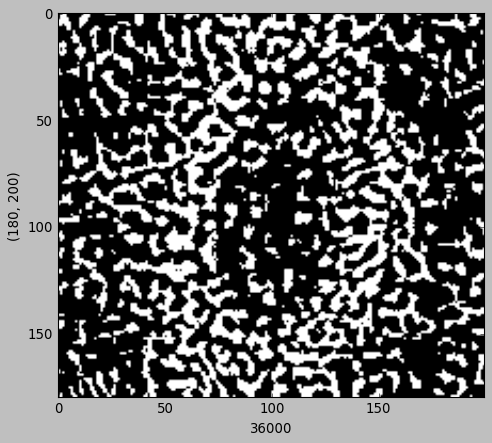

In [11]:
Example_IMG = cv2.imread(JPG_Path_Series[2137],0)
Cut_Example_IMG = Example_IMG[120:300,110:310]
AdaptiveThresh_IMG = cv2.adaptiveThreshold(Cut_Example_IMG,200,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,11,2)
plt.xlabel(AdaptiveThresh_IMG.size)
plt.ylabel(AdaptiveThresh_IMG.shape)
plt.imshow(AdaptiveThresh_IMG,cmap="Greys_r")

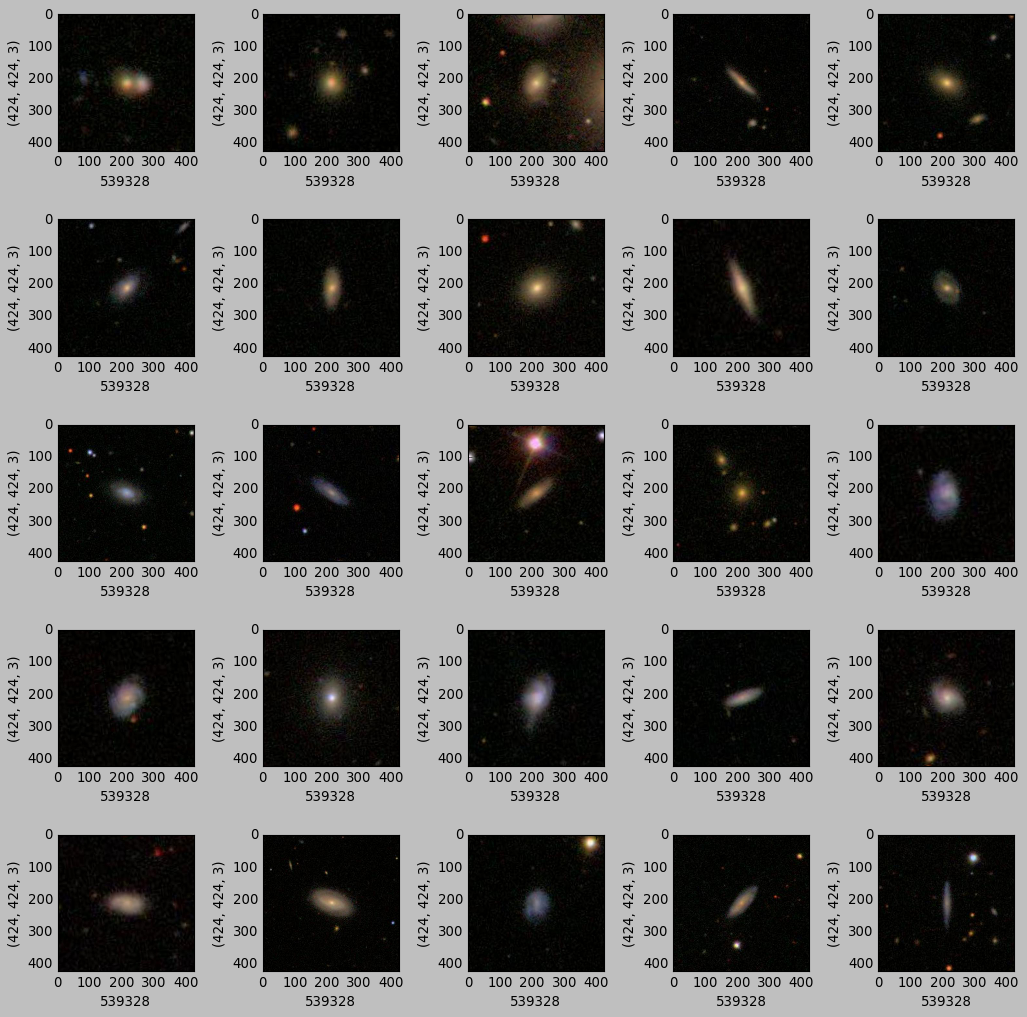

In [12]:
figure,axes = plt.subplots(nrows=5,ncols=5,figsize=(13,13))
for i,ax in enumerate(axes.flat):
    IMG = plt.imread(JPG_Path_Series[i])
    ax.imshow(IMG)
    ax.set_xlabel(IMG.size)
    ax.set_ylabel(IMG.shape)
plt.tight_layout()
plt.show()

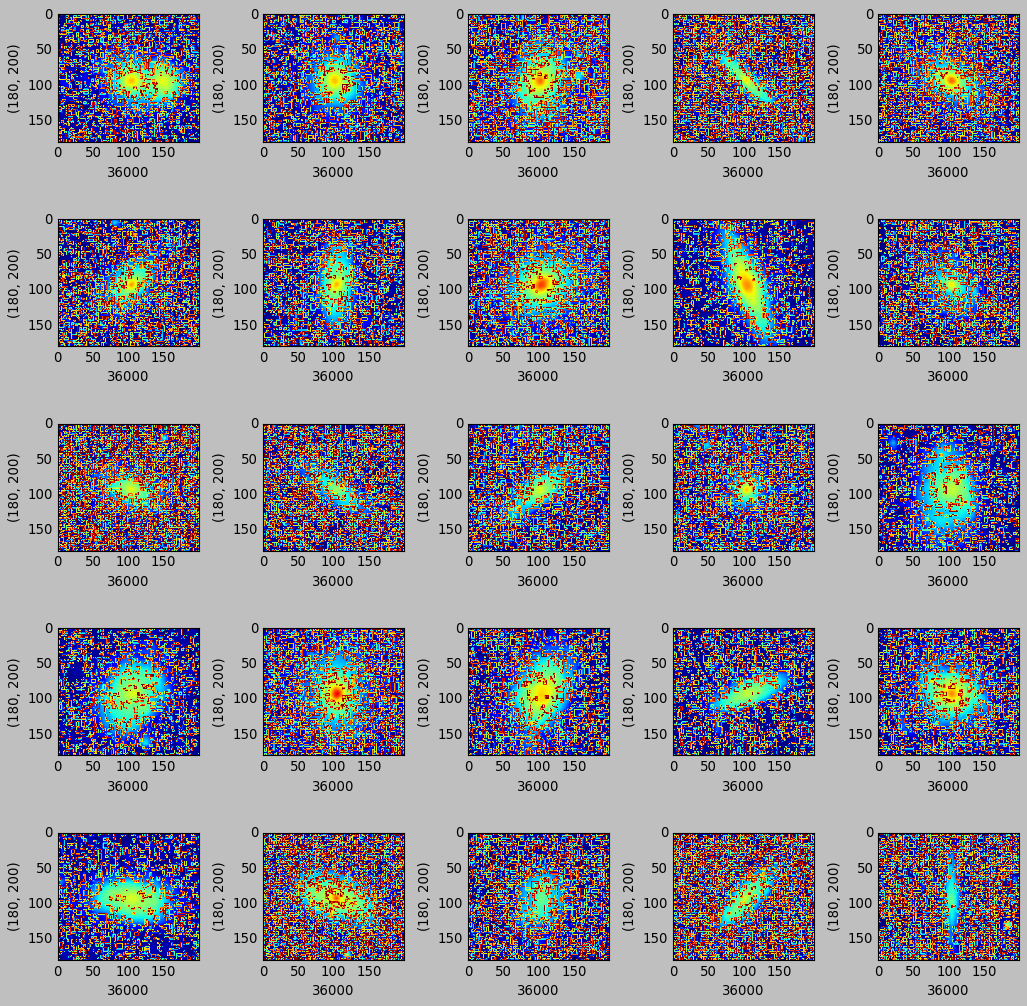

In [13]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(13,13))

for i,ax in enumerate(axis.flat):
    IMG = cv2.imread(JPG_Path_Series[i],0)
    C_IMG = IMG[120:300,110:310]
    A_IMG = cv2.adaptiveThreshold(C_IMG,200,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,15,1)
    CAN_IMG = cv2.Canny(A_IMG,1000,1000)
    Contour,_ = cv2.findContours(CAN_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    for cnt in Contour:
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(C_IMG,(x,y),(x+w,y+h),(255,0,0),1)
    ax.imshow(C_IMG)
    ax.set_xlabel(C_IMG.size)
    ax.set_ylabel(C_IMG.shape)
plt.tight_layout()
plt.show()

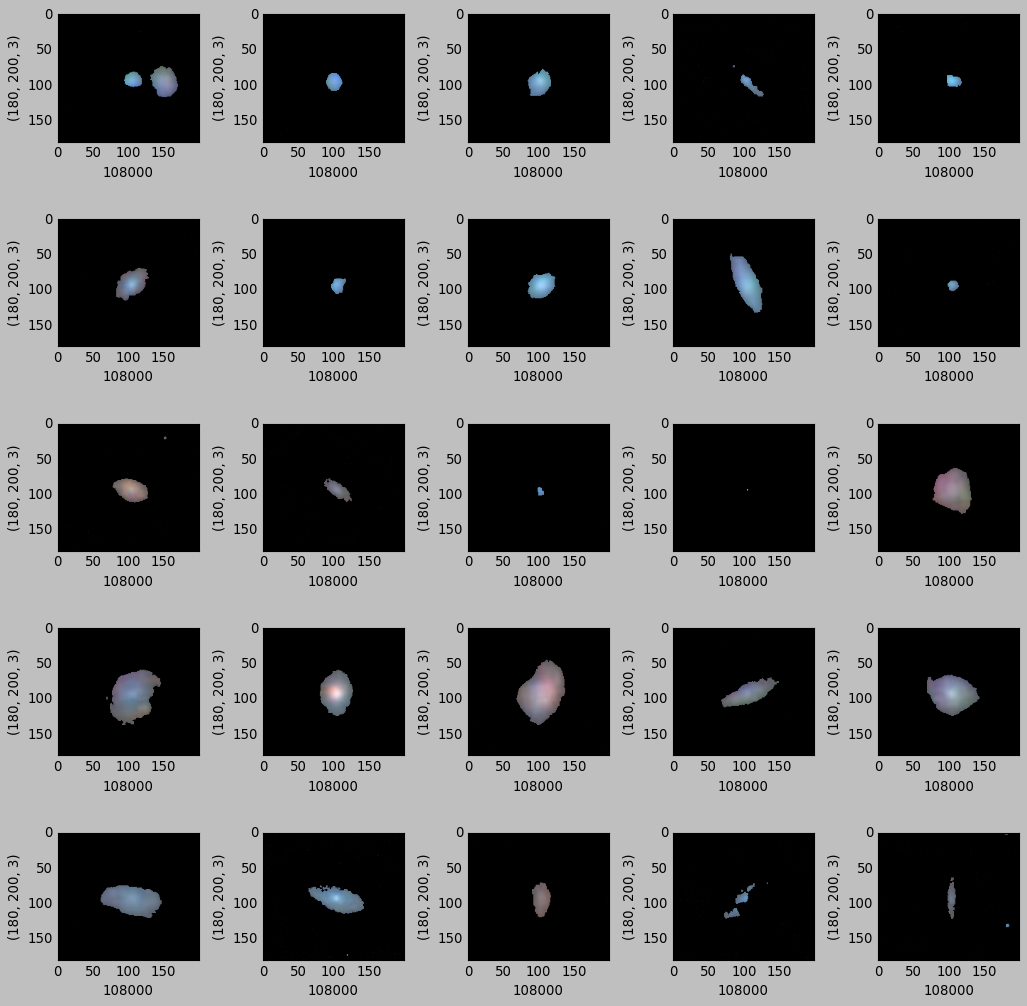

In [14]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(13,13))

for i,ax in enumerate(axis.flat):
    IMG = cv2.imread(JPG_Path_Series[i])
    #IMG = cv2.cvtColor(IMG,cv2.COLOR_BGR2RGB)
    C_IMG = IMG[120:300,110:310]
    _,Thresh_IMG = cv2.threshold(C_IMG,90,255,cv2.THRESH_BINARY)
    mask = cv2.inRange(C_IMG, C_IMG, Thresh_IMG)
    kernal = np.ones((2, 2), dtype="uint8")
    Dilate_IMG  = cv2.dilate(mask,kernal)
    Sub_L_IMG = cv2.bitwise_and(C_IMG,C_IMG,mask=Dilate_IMG)
    ax.imshow(Sub_L_IMG,cmap="Greys_r")
    ax.set_xlabel(Sub_L_IMG.size)
    ax.set_ylabel(Sub_L_IMG.shape)
plt.tight_layout()
plt.show()

## Cross-referencing the images with Table 1

Reading data about galaxies from the file downloaded from kaggle

In [15]:
galaxies = pd.read_csv("../data/gz2_filename_mapping.csv")
galaxies

objid            sample  asset_id
0        587722981736120347          original         1
1        587722981736579107          original         2
2        587722981741363294          original         3
3        587722981741363323          original         4
4        587722981741559888          original         5
...                     ...               ...       ...
355985  8647475122541625731  stripe82_coadd_2    355986
355986  8647475122541625762  stripe82_coadd_2    355987
355987  8647475122541625774  stripe82_coadd_2    355988
355988  8647475122761762019  stripe82_coadd_2    355989
355989  8647475122761762804  stripe82_coadd_2    355990

[355990 rows x 3 columns]

Reading Table1 containing galaxies' descriptions presented in Hart et al. (2016)

In [16]:
table1 = pd.read_csv("../data/gz2_hart16.csv")
table1.rename(columns={'dr7objid':'objid'},inplace=True)
table1

objid          ra        dec     rastring    decstring  \
0       587732591714893851  179.042984  60.522518  11:56:10.32  +60:31:21.1   
1       588009368545984617  135.084396  52.494240  09:00:20.26  +52:29:39.3   
2       587732484359913515  183.371979  50.741508  12:13:29.27  +50:44:29.4   
3       587741723357282317  186.251953  28.558598  12:25:00.47  +28:33:31.0   
4       587738410866966577  161.086395  14.084465  10:44:20.73  +14:05:04.1   
...                    ...         ...        ...          ...          ...   
239690  587741490371625059  167.542648  28.991867  11:10:10.23  +28:59:30.7   
239691  587731174917669027  316.108826   1.214799  21:04:26.12  +01:12:53.3   
239692  587731512070177108   21.690212  -0.546427  01:26:45.65  +00:32:47.1   
239693  587731513145688256   25.747143   0.360079  01:42:59.31  +00:21:36.3   
239694  588015507679805636   48.130630  -1.112244  03:12:31.35  -01:06:44.1   

          sample gz2_class  total_classifications  total_votes  \
0       original      Sc+t                     45          342   
1       original      Sb+t                     42          332   
2       original        Ei                     36          125   
3       original      Sc+t                     28          218   
4       original        Er                     43          151   
...          ...       ...                    ...          ...   
239690     extra        Ec                     42          135   
239691  stripe82     Ei(i)                     46          186   
239692  stripe82        Ei                     48          164   
239693  stripe82     Ei(i)                     48          204   
239694  stripe82        Ec                     49          170   

        t01_smooth_or_features_a01_smooth_count  ...  \
0                                             0  ...   
1                                             1  ...   
2                                            28  ...   
3                                             1  ...   
4                                            33  ...   
...                                         ...  ...   
239690                                       34  ...   
239691                                       25  ...   
239692                                       36  ...   
239693                                       25  ...   
239694                                       36  ...   

        t11_arms_number_a36_more_than_4_fraction  \
0                                          0.450   
1                                          0.512   
2                                          0.000   
3                                          0.240   
4                                          0.000   
...                                          ...   
239690                                     0.000   
239691                                     0.000   
239692                                     0.000   
239693                                     0.000   
239694                                     0.000   

        t11_arms_number_a36_more_than_4_weighted_fraction  \
0                                                   0.450   
1                                                   0.503   
2                                                   0.000   
3                                                   0.240   
4                                                   0.000   
...                                                   ...   
239690                                              0.000   
239691                                              0.000   
239692                                              0.000   
239693                                              0.000   
239694                                              0.000   

        t11_arms_number_a36_more_than_4_debiased  \
0                                       0.482646   
1                                       0.504833   
2                                       0.000000   
3                                       

Left join on this both tables

In [17]:
dataset = pd.merge(galaxies, table1, on = 'objid', how = 'left')

In [18]:
test = dataset.loc[dataset['dec'].isna()]
test

objid          sample_x  asset_id  ra  dec rastring  \
0        587722981736120347          original         1 NaN  NaN      NaN   
1        587722981736579107          original         2 NaN  NaN      NaN   
9        587722981741691055          original        10 NaN  NaN      NaN   
61       587722981745819655          original        62 NaN  NaN      NaN   
63       587722981746082020          original        64 NaN  NaN      NaN   
...                     ...               ...       ...  ..  ...      ...   
355985  8647475122541625731  stripe82_coadd_2    355986 NaN  NaN      NaN   
355986  8647475122541625762  stripe82_coadd_2    355987 NaN  NaN      NaN   
355987  8647475122541625774  stripe82_coadd_2    355988 NaN  NaN      NaN   
355988  8647475122761762019  stripe82_coadd_2    355989 NaN  NaN      NaN   
355989  8647475122761762804  stripe82_coadd_2    355990 NaN  NaN      NaN   

       decstring sample_y gz2_class  total_classifications  ...  \
0            NaN      NaN       NaN                    NaN  ...   
1            NaN      NaN       NaN                    NaN  ...   
9            NaN      NaN       NaN                    NaN  ...   
61           NaN      NaN       NaN                    NaN  ...   
63           NaN      NaN       NaN                    NaN  ...   
...          ...      ...       ...                    ...  ...   
355985       NaN      NaN       NaN                    NaN  ...   
355986       NaN      NaN       NaN                    NaN  ...   
355987       NaN      NaN       NaN                    NaN  ...   
355988       NaN      NaN       NaN                    NaN  ...   
355989       NaN      NaN       NaN                    NaN  ...   

        t11_arms_number_a36_more_than_4_fraction  \
0                                            NaN   
1                                            NaN   
9                                            NaN   
61                                           NaN   
63                                           NaN   
...                                          ...   
355985                                       NaN   
355986                                       NaN   
355987                                       NaN   
355988                                       NaN   
355989                                       NaN   

        t11_arms_number_a36_more_than_4_weighted_fraction  \
0                                                     NaN   
1                                                     NaN   
9                                                     NaN   
61                                                    NaN   
63                                                    NaN   
...                                                   ...   
355985                                                NaN   
355986                                                NaN   
355987                                                NaN   
355988                                                NaN   
355989                                                NaN   

        t11_arms_number_a36_more_than_4_debiased  \
0                                            NaN   
1                                            NaN   
9                                            NaN   
61                                           NaN   
63                                           NaN   
...                                          ...   
355985                                       NaN   
355986                                       NaN   
355987                                       NaN   
355988                                       NaN   
355989                                       NaN   

        t11_arms_number_a36_more_than_4_flag  \
0                                        NaN   
1                                        NaN   
9                                        NaN   
61                                       NaN   
63                                       NaN   
...                  

We have noticed that around 116295 rows from the galaxies file don't exist in the table1. We have also found out that galaxies file contains some galaxies that are not represented by any image. We'll try to delete them.

First, let's try to create a list of asset_id of images that we currently have access to.

In [19]:
list_of_images = pd.DataFrame(JPG_Path_Series)

# Extracting the file name without extension
list_of_images['asset_id'] = list_of_images['JPG'].apply(lambda x: os.path.splitext(os.path.basename(x))[0])

list_of_images = list_of_images.drop('JPG', axis=1)

list_of_images['asset_id'] = list_of_images['asset_id'].astype(int)

list_of_images

asset_id
0            100
1           1000
2          10000
3         100000
4         100001
...          ...
243429     99995
243430     99996
243431     99997
243432     99998
243433     99999

[243434 rows x 1 columns]

Now let's delete all the rows which don't have any image representation. We'll do it by left join.

In [20]:
dataset = pd.merge(list_of_images, dataset, on = 'asset_id', how = 'left')

dataset

asset_id               objid  sample_x          ra        dec  \
0            100  587722981748113567  original  198.368484  -1.211204   
1           1000  587722983355384011  original  190.666809   0.157213   
2          10000  587725552269000786  original  119.198418  45.877827   
3         100000  587736915138969726  original  213.330490  12.739978   
4         100001  587736915139035228  original  213.468445  12.696736   
...          ...                 ...       ...         ...        ...   
243429     99995  587736915138445458  original  212.127396  12.819022   
243430     99996  587736915138445484  original  212.128525  12.801238   
243431     99997  587736915138576534  original  212.507202  12.872880   
243432     99998  587736915138773162  original  212.951721  12.791821   
243433     99999  587736915138904245  original  213.286041  12.831583   

           rastring    decstring  sample_y gz2_class  total_classifications  \
0       13:13:28.44  -01:12:40.3  original   Sc?t(r)                   47.0   
1       12:42:40.03  +00:09:26.0  original        Er                   42.0   
2       07:56:47.62  +45:52:40.2  original        Ei                   39.0   
3       14:13:19.32  +12:44:23.9  original       Ser                   50.0   
4       14:13:52.43  +12:41:48.3  original        Ei                   43.0   
...             ...          ...       ...       ...                    ...   
243429  14:08:30.57  +12:49:08.5  original     Sd(i)                   34.0   
243430  14:08:30.85  +12:48:04.5  original     Sd(i)                   38.0   
243431  14:10:01.73  +12:52:22.4  original       Ser                   45.0   
243432  14:11:48.41  +12:47:30.6  original        Er                   45.0   
243433  14:13:08.65  +12:49:53.7  original        Ei                   43.0   

        ...  t11_arms_number_a36_more_than_4_fraction  \
0       ...                                       0.0   
1       ...                                       0.0   
2       ...                                       0.0   
3       ...                                       0.0   
4       ...                                       0.0   
...     ...                                       ...   
243429  ...                                       0.2   
243430  ...                                       0.0   
243431  ...                                       0.0   
243432  ...                                       0.0   
243433  ...                                       0.0   

        t11_arms_number_a36_more_than_4_weighted_fraction  \
0                                                     0.0   
1                                                     0.0   
2                                                     0.0   
3                                                     0.0   
4                                                     0.0   
...                                                   ...   
243429                                                0.2   
243430                                                0.0   
243431                                                0.0   
243432                                                0.0   
243433                                                0.0   

        t11_arms_number_a36_more_than_4_debiased  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
243429                                       0.2   
243430                                       0.0   
243431                                       0.0   
243432                                       0.0   
243433                                       0.0   

        t11_arms_number_a36_more_than_4_flag  \
0                                        0.0   
1                                        0.

In [21]:
missing_description = dataset.loc[dataset['dec'].isna()]
missing_description

asset_id               objid  sample_x  ra  dec rastring decstring  \
443       100440  587736915688161582  original NaN  NaN      NaN       NaN   
518       100517  587736916216447050  original NaN  NaN      NaN       NaN   
678       100687  587736916751089740  original NaN  NaN      NaN       NaN   
715       100724  587736916753186858  original NaN  NaN      NaN       NaN   
1701      101673  587736940910936227  original NaN  NaN      NaN       NaN   
...          ...                 ...       ...  ..  ...      ...       ...   
242518     99101  587736812600426681  original NaN  NaN      NaN       NaN   
242660     99240  587736813137166677  original NaN  NaN      NaN       NaN   
243133       997  587722983355318470  original NaN  NaN      NaN       NaN   
243350     99910  587736914604195937  original NaN  NaN      NaN       NaN   
243355     99915  587736914604589390  original NaN  NaN      NaN       NaN   

       sample_y gz2_class  total_classifications  ...  \
443         NaN       NaN                    NaN  ...   
518         NaN       NaN                    NaN  ...   
678         NaN       NaN                    NaN  ...   
715         NaN       NaN                    NaN  ...   
1701        NaN       NaN                    NaN  ...   
...         ...       ...                    ...  ...   
242518      NaN       NaN                    NaN  ...   
242660      NaN       NaN                    NaN  ...   
243133      NaN       NaN                    NaN  ...   
243350      NaN       NaN                    NaN  ...   
243355      NaN       NaN                    NaN  ...   

        t11_arms_number_a36_more_than_4_fraction  \
443                                          NaN   
518                                          NaN   
678                                          NaN   
715                                          NaN   
1701                                         NaN   
...                                          ...   
242518                                       NaN   
242660                                       NaN   
243133                                       NaN   
243350                                       NaN   
243355                                       NaN   

        t11_arms_number_a36_more_than_4_weighted_fraction  \
443                                                   NaN   
518                                                   NaN   
678                                                   NaN   
715                                                   NaN   
1701                                                  NaN   
...                                                   ...   
242518                                                NaN   
242660                                                NaN   
243133                                                NaN   
243350                                                NaN   
243355                                                NaN   

        t11_arms_number_a36_more_than_4_debiased  \
443                                          NaN   
518                                          NaN   
678                                          NaN   
715                                          NaN   
1701                                         NaN   
...                                          ...   
242518                                       NaN   
242660                                       NaN   
243133                                       NaN   
243350                                       NaN   
243355                                       NaN   

        t11_arms_number_a36_more_than_4_flag  \
443                                      NaN   
518                                      NaN   
678                                      NaN   
715                                      NaN   
1701                                     NaN   
...                                      ...   
242518                                   NaN   
242660             

But it turns out we still have 3861 rows with a lot of NaNs. We decided to delete them, because it's not a statistically important sample (we have already enough or maybe even too much data for our needs). And model based on these missing observations may not be as accurate.

In [22]:
dataset = dataset.dropna(how = 'any')

dataset

asset_id               objid  sample_x          ra        dec  \
0            100  587722981748113567  original  198.368484  -1.211204   
1           1000  587722983355384011  original  190.666809   0.157213   
2          10000  587725552269000786  original  119.198418  45.877827   
3         100000  587736915138969726  original  213.330490  12.739978   
4         100001  587736915139035228  original  213.468445  12.696736   
...          ...                 ...       ...         ...        ...   
243429     99995  587736915138445458  original  212.127396  12.819022   
243430     99996  587736915138445484  original  212.128525  12.801238   
243431     99997  587736915138576534  original  212.507202  12.872880   
243432     99998  587736915138773162  original  212.951721  12.791821   
243433     99999  587736915138904245  original  213.286041  12.831583   

           rastring    decstring  sample_y gz2_class  total_classifications  \
0       13:13:28.44  -01:12:40.3  original   Sc?t(r)                   47.0   
1       12:42:40.03  +00:09:26.0  original        Er                   42.0   
2       07:56:47.62  +45:52:40.2  original        Ei                   39.0   
3       14:13:19.32  +12:44:23.9  original       Ser                   50.0   
4       14:13:52.43  +12:41:48.3  original        Ei                   43.0   
...             ...          ...       ...       ...                    ...   
243429  14:08:30.57  +12:49:08.5  original     Sd(i)                   34.0   
243430  14:08:30.85  +12:48:04.5  original     Sd(i)                   38.0   
243431  14:10:01.73  +12:52:22.4  original       Ser                   45.0   
243432  14:11:48.41  +12:47:30.6  original        Er                   45.0   
243433  14:13:08.65  +12:49:53.7  original        Ei                   43.0   

        ...  t11_arms_number_a36_more_than_4_fraction  \
0       ...                                       0.0   
1       ...                                       0.0   
2       ...                                       0.0   
3       ...                                       0.0   
4       ...                                       0.0   
...     ...                                       ...   
243429  ...                                       0.2   
243430  ...                                       0.0   
243431  ...                                       0.0   
243432  ...                                       0.0   
243433  ...                                       0.0   

        t11_arms_number_a36_more_than_4_weighted_fraction  \
0                                                     0.0   
1                                                     0.0   
2                                                     0.0   
3                                                     0.0   
4                                                     0.0   
...                                                   ...   
243429                                                0.2   
243430                                                0.0   
243431                                                0.0   
243432                                                0.0   
243433                                                0.0   

        t11_arms_number_a36_more_than_4_debiased  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
243429                                       0.2   
243430                                       0.0   
243431                                       0.0   
243432                                       0.0   
243433                                       0.0   

        t11_arms_number_a36_more_than_4_flag  \
0                                        0.0   
1                                        0.

We've done this deletion with our dataset, now let's do it with JPG_Path_Series

In [23]:
def path_series_splitting(df, path_series):
    # Converting asset_id to string if it's not already, to match the file name extraction
    list_of_assets = df['asset_id'].astype(str)

    # Extracting the numeric part of the file name from the paths
    # This assumes file names are structured as shown and are at the end of the path before the extension
    numeric_part = path_series.apply(lambda x: os.path.splitext(os.path.basename(x))[0])

    # Filter path_series based on whether the numeric part is in list_of_assets
    path_series = path_series[numeric_part.isin(list_of_assets)]

    # Reset the index of the filtered series
    path_series = path_series.reset_index(drop=True)

    # Show the filtered series
    print(path_series)

    return path_series

JPG_Path_Series = path_series_splitting(dataset, JPG_Path_Series)

0            ..\images_gz2\images\100.jpg
1           ..\images_gz2\images\1000.jpg
2          ..\images_gz2\images\10000.jpg
3         ..\images_gz2\images\100000.jpg
4         ..\images_gz2\images\100001.jpg
                       ...               
239262     ..\images_gz2\images\99995.jpg
239263     ..\images_gz2\images\99996.jpg
239264     ..\images_gz2\images\99997.jpg
239265     ..\images_gz2\images\99998.jpg
239266     ..\images_gz2\images\99999.jpg
Name: JPG, Length: 239267, dtype: object


## DATA SPLIT

We decided to split our dataset into three samples:
* Test sample containing 30% of observations will be dedicated for validation team
* Training sample containing 49% of observations will be used to create a model
* Validation unit containing 21% of observations will be used by a development team to validate if created models are correct 

In [24]:
# Splitting the data into 70% train_val and 30% test
train_val_df, test_df = train_test_split(dataset, test_size=0.3, random_state=42)

# Splitting the 70% train_val into 49% train and 21% validation
train_df, val_df = train_test_split(train_val_df, test_size=0.3, random_state=42)  # 30% of 70% is 21%

# Save the splits to CSV files
train_csv_path = 'train_data.csv'
val_csv_path = 'val_data.csv'
test_csv_path = 'test_data.csv'

train_df.to_csv(train_csv_path, index=False)
val_df.to_csv(val_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

# Save the PathSeries for each split
train_path_series = path_series_splitting(train_df, JPG_Path_Series)
val_path_series = path_series_splitting(test_df, JPG_Path_Series)
test_path_series = path_series_splitting(val_df, JPG_Path_Series)

train_path_series_path = 'train_path_series.pkl'
val_path_series_path = 'val_path_series.pkl'
test_path_series_path = 'test_path_series.pkl'

train_path_series.to_pickle(train_path_series_path)
val_path_series.to_pickle(val_path_series_path)
test_path_series.to_pickle(test_path_series_path)

print("Data split and saved successfully.")

0           ..\images_gz2\images\1000.jpg
1          ..\images_gz2\images\10000.jpg
2         ..\images_gz2\images\100002.jpg
3         ..\images_gz2\images\100004.jpg
4         ..\images_gz2\images\100005.jpg
                       ...               
117235     ..\images_gz2\images\99993.jpg
117236     ..\images_gz2\images\99994.jpg
117237     ..\images_gz2\images\99996.jpg
117238     ..\images_gz2\images\99998.jpg
117239     ..\images_gz2\images\99999.jpg
Name: JPG, Length: 117240, dtype: object
0        ..\images_gz2\images\100001.jpg
1        ..\images_gz2\images\100003.jpg
2        ..\images_gz2\images\100008.jpg
3         ..\images_gz2\images\10001.jpg
4        ..\images_gz2\images\100019.jpg
                      ...               
71776     ..\images_gz2\images\99983.jpg
71777     ..\images_gz2\images\99985.jpg
71778     ..\images_gz2\images\99986.jpg
71779     ..\images_gz2\images\99991.jpg
71780     ..\images_gz2\images\99997.jpg
Name: JPG, Length: 71781, dtype: object
0     

# EDA

For EDA we'll use only train dataset. Let's read then this dataframe.

In [26]:
# File paths
train_csv_path = '../data/train_data.csv'
train_path_series_path = '../data/train_path_series.pkl'

# Load the training DataFrame
dataset = pd.read_csv(train_csv_path)

# Load the training PathSeries
JPG_Path_Series = pd.read_pickle(train_path_series_path)

Let's also add path to the photos to our dataframe

In [27]:
# Defining the base path where images are stored
base_path = r'..\images_gz2\images'

# Function to convert asset_id to a proper image path
def get_image_path(asset_id):
    return os.path.join(base_path, f'{asset_id}.jpg')

# Convert asset_id to image path
dataset['image_path'] = dataset['asset_id'].apply(lambda x: get_image_path(x))

1. Basic Structure: Let's get the overall structure and try to identify missing values

In [28]:
structure_info = {
    "Total Rows": len(dataset),
    "Total Columns": len(dataset.columns),
    "Missing Values": dataset.isnull().sum().sum()
}

structure_info

{'Total Rows': 117240, 'Total Columns': 234, 'Missing Values': 0}

In our dataset we have currently 239637 rows so exactly as many as paths to photos in JPG_Path_Series. What's important, there are no missing values in our dataset now so we don't have to worry about that

2. Galaxy Classifications: Distribution of 'gz2_class'

In [29]:
gz2_class_distribution = dataset['gz2_class'].value_counts()

gz2_class_distribution

gz2_class
Ei         21507
Er         17632
Ser         6832
Sc?t        6681
Ec          5051
           ...  
Sa(l)          1
Sd2t(o)        1
SBd1l          1
Sa2l(m)        1
Sc4m(l)        1
Name: count, Length: 736, dtype: int64

That column might be important in clustering the galaxies. Elliptical galaxies may be indicated by classifications like 'E' followed by a number or descriptor. Spiral galaxies could be classified under 'S' or 'SB' with additional descriptors indicating the presence of arms, like 'Sc', 'Sb', 'Sa', etc. Irregular galaxies might be indicated by classes like 'Irr', 'Pec', or any notation that implies irregularity.
 

3. Visualizing Astronomical Data: Scatter plot of ra (right ascension) and dec (declination)

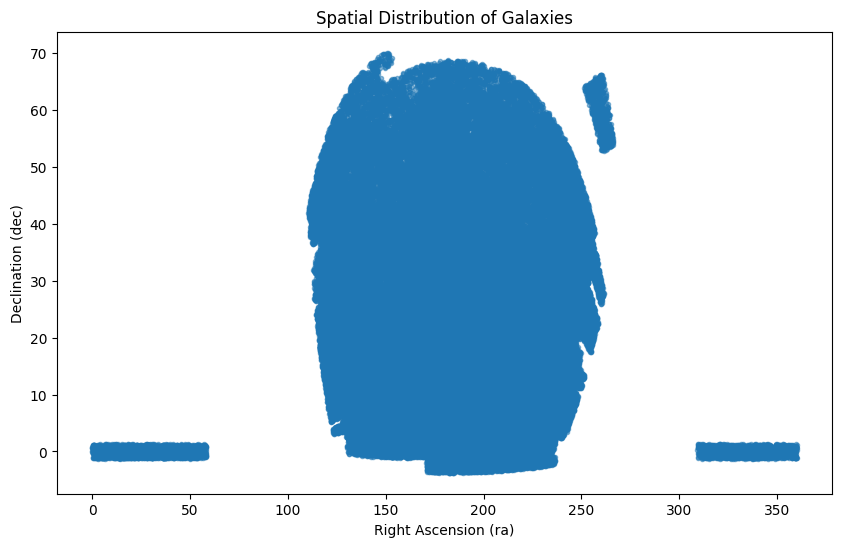

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset['ra'], dataset['dec'], alpha=0.5, marker='.')
plt.xlabel('Right Ascension (ra)')
plt.ylabel('Declination (dec)')
plt.title('Spatial Distribution of Galaxies')
plt.show()

We can easily see four groups on this plot and we'll try to find out what they can indicate.

4. Statistical Summary: Summary statistics for numerical columns

In [ ]:
numerical_stats = dataset.describe()

numerical_stats

asset_id         objid             ra            dec  \
count  117240.000000  1.172400e+05  117240.000000  117240.000000   
mean   141838.132472  5.878183e+17     185.311060      26.051899   
std     81401.820623  1.831482e+14      47.916219      18.202944   
min         5.000000  5.877230e+17       0.032579      -3.740869   
25%     72106.500000  5.877327e+17     154.039299      10.690485   
50%    140318.500000  5.877393e+17     185.899277      24.698424   
75%    212195.750000  5.877430e+17     219.773701      39.704969   
max    295305.000000  5.888489e+17     359.967255      70.072289   

       total_classifications    total_votes  \
count          117240.000000  117240.000000   
mean               42.578019     179.302337   
std                 5.857866      60.857360   
min                18.000000      45.000000   
25%                39.000000     140.000000   
50%                43.000000     157.000000   
75%                46.000000     196.000000   
max                79.000000     604.000000   

       t01_smooth_or_features_a01_smooth_count  \
count                            117240.000000   
mean                                 27.565268   
std                                  13.254523   
min                                   0.000000   
25%                                  18.000000   
50%                                  32.000000   
75%                                  38.000000   
max                                  68.000000   

       t01_smooth_or_features_a01_smooth_weight  \
count                             117240.000000   
mean                                  27.438706   
std                                   13.236761   
min                                    0.000000   
25%                                   18.000000   
50%                                   31.666000   
75%                                   38.000000   
max                                   66.280998   

       t01_smooth_or_features_a01_smooth_fraction  \
count                               117240.000000   
mean                                     0.638323   
std                                      0.284683   
min                                      0.000000   
25%                                      0.455000   
50%                                      0.757000   
75%                                      0.860000   
max                                      1.000000   

       t01_smooth_or_features_a01_smooth_weighted_fraction  ...  \
count                                      117240.000000    ...   
mean                                            0.644514    ...   
std                                             0.288029    ...   
min                                             0.000000    ...   
25%                                             0.459000    ...   
50%                                             0.766000    ...   
75%                                             0.870000    ...   
max                                             1.000000    ...   

       t11_arms_number_a36_more_than_4_fraction  \
count                             117240.000000   
mean                                   0.017175   
std                                    0.099103   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    0.000000   
max                                    1.000000   

       t11_arms_number_a36_more_than_4_weighted_fraction  \
count                                      117240.000000   
mean                                            0.016691   
std                                             0.096993   
min                                             0.000000   
25%                                             0.000000   
50%                                             0.000000   
75%                                             0.000000   
max                                       

5. Correlation Analysis: Correlation matrix for features starting with 't11_arms_number'

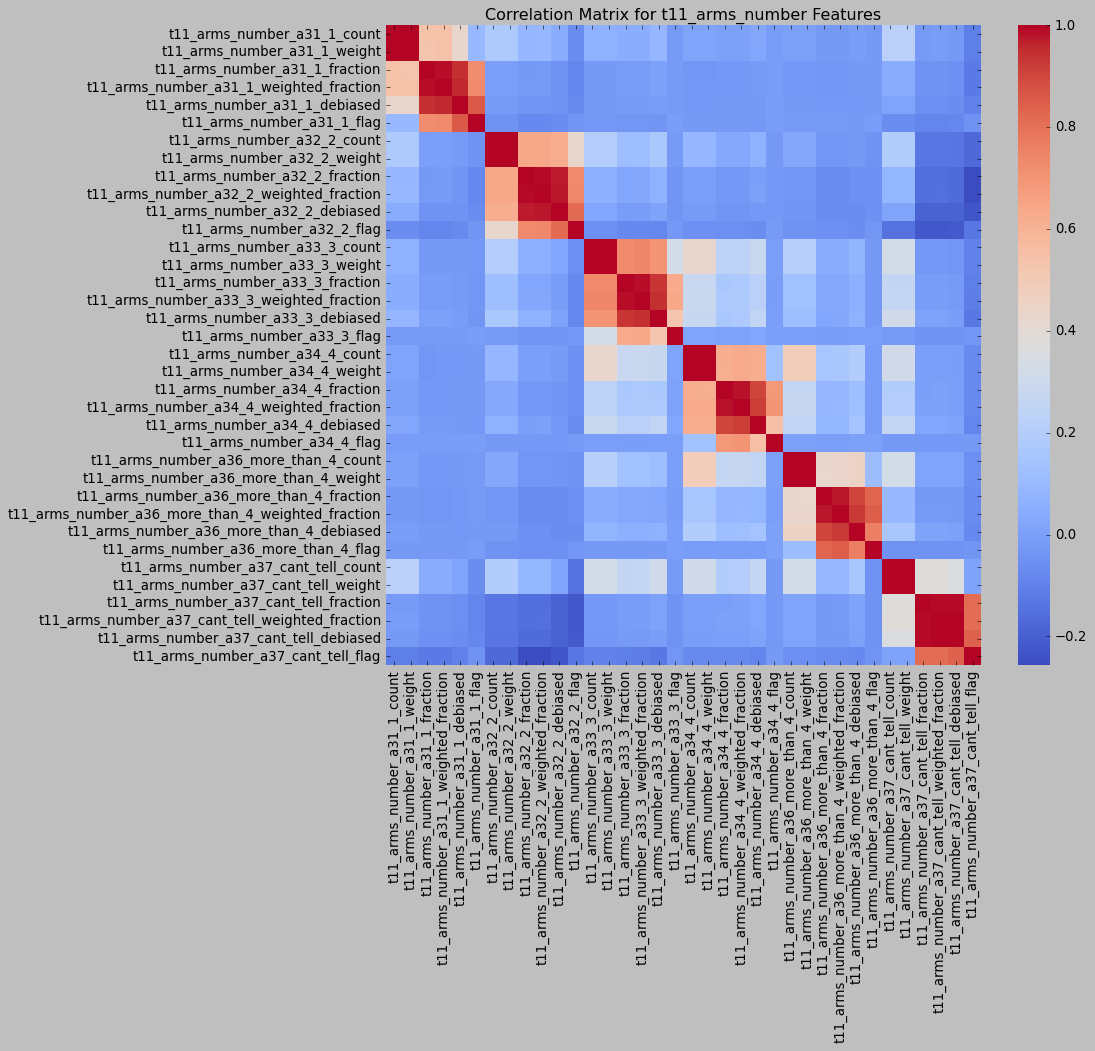

In [47]:
t11_columns = [col for col in dataset.columns if col.startswith('t11_arms_number')]
t11_corr = dataset[t11_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(t11_corr,  fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for t11_arms_number Features")
plt.show()

6. Feature Distribution: To further understand the distribution and identify any outliers or skewness in key features, let's plot histograms or density plots.

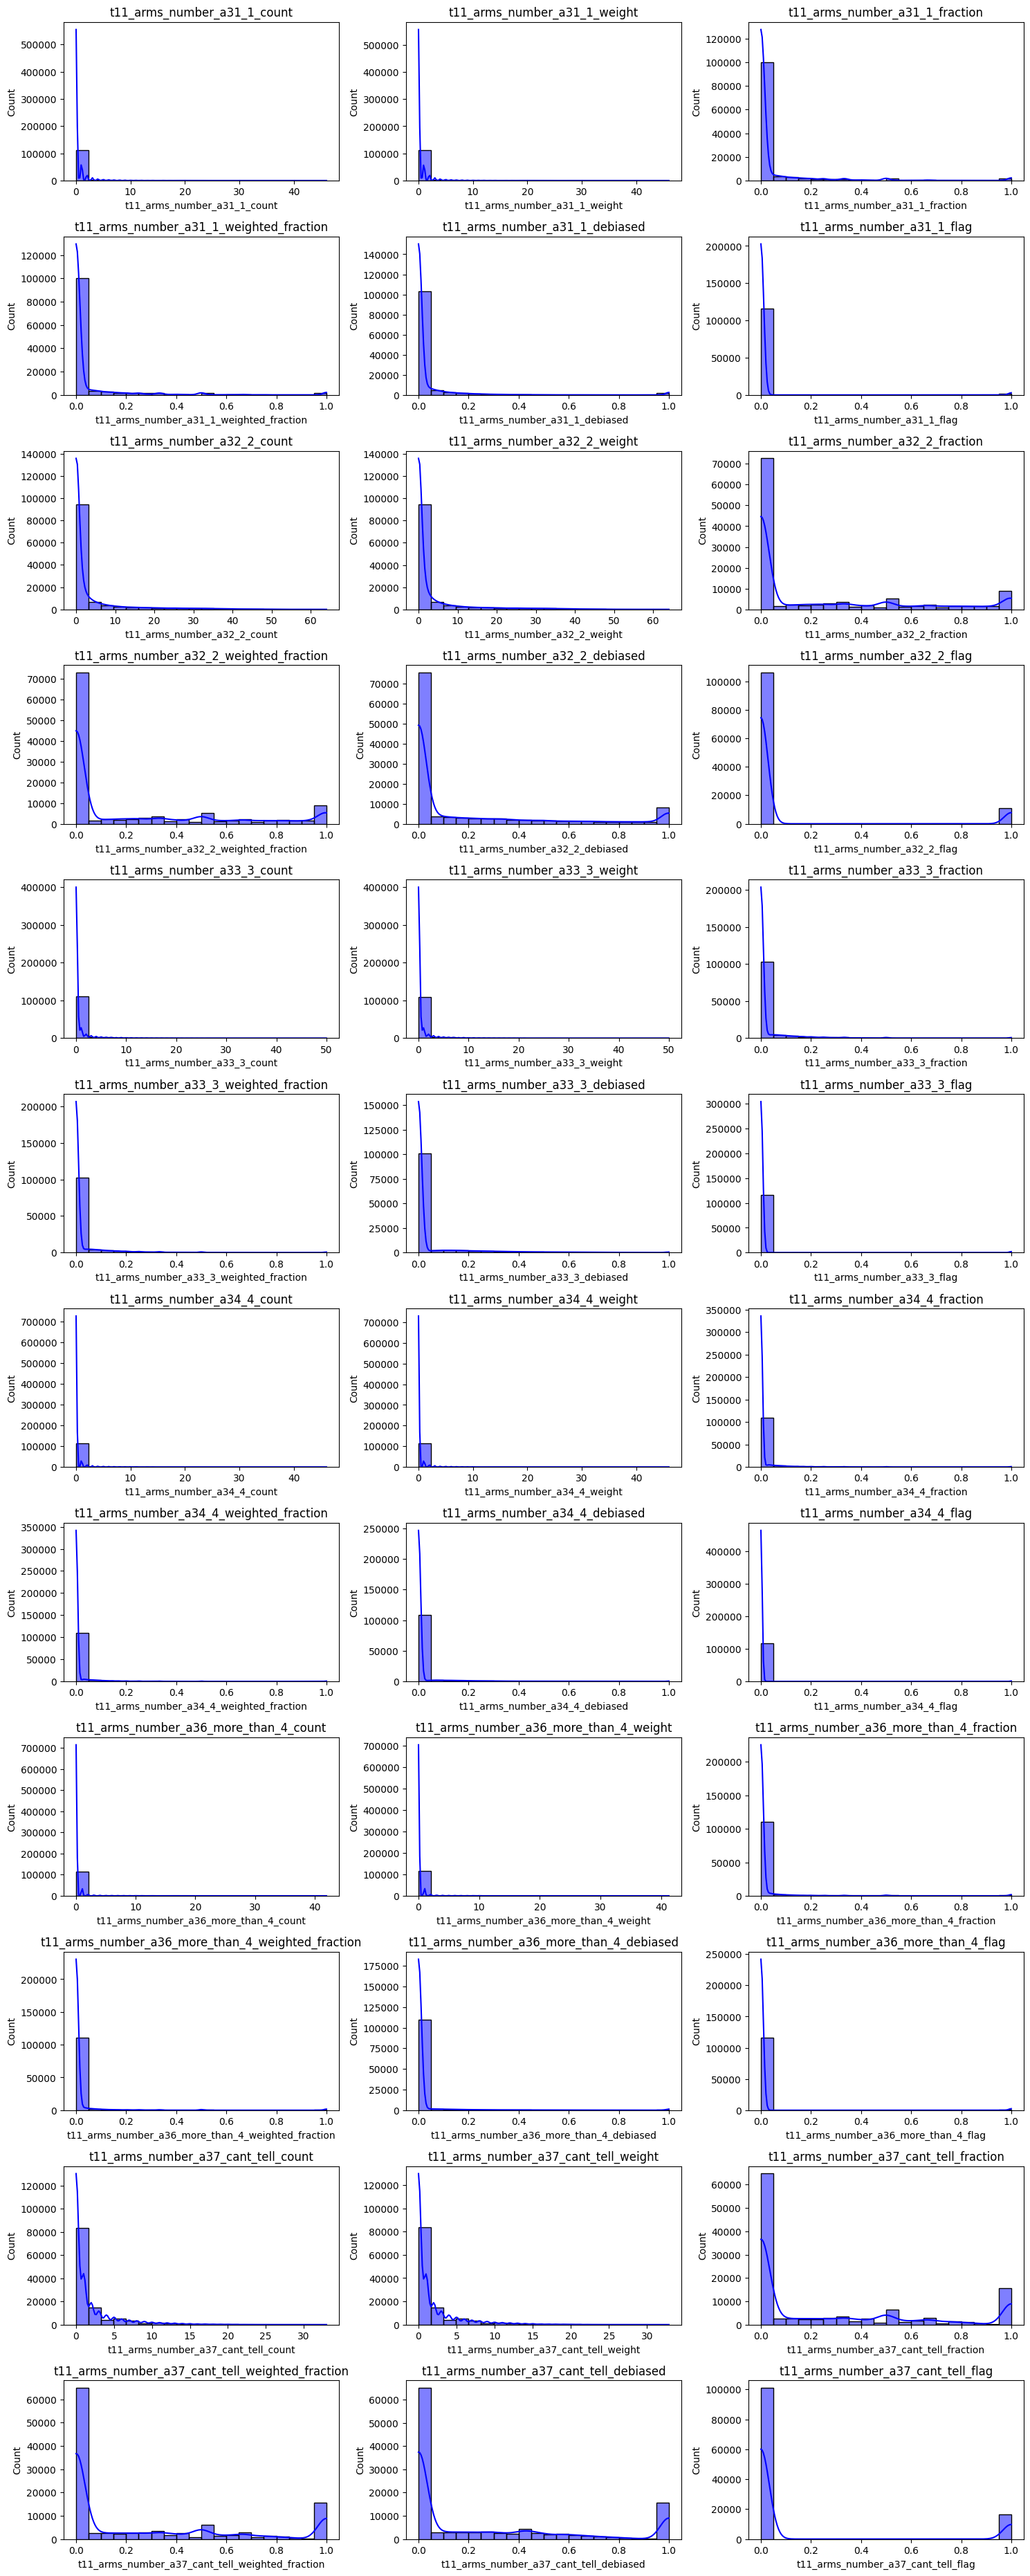

In [ ]:
# Let's plot histograms or density plots for key features starting with 't11_arms_number'
plt.figure(figsize=(15,40))
for i, col in enumerate(t11_columns, 1):
    plt.subplot(len(t11_columns)//3 + 1, 3, i)
    sns.histplot(dataset[col], kde=True, bins=20, color='blue')
    plt.title(col)
    plt.tight_layout()

plt.show()

We can see that distributions of all the features are concentrated around value 0. Now let's find out how would these histograms look like if we didn't consider values equal to 0.

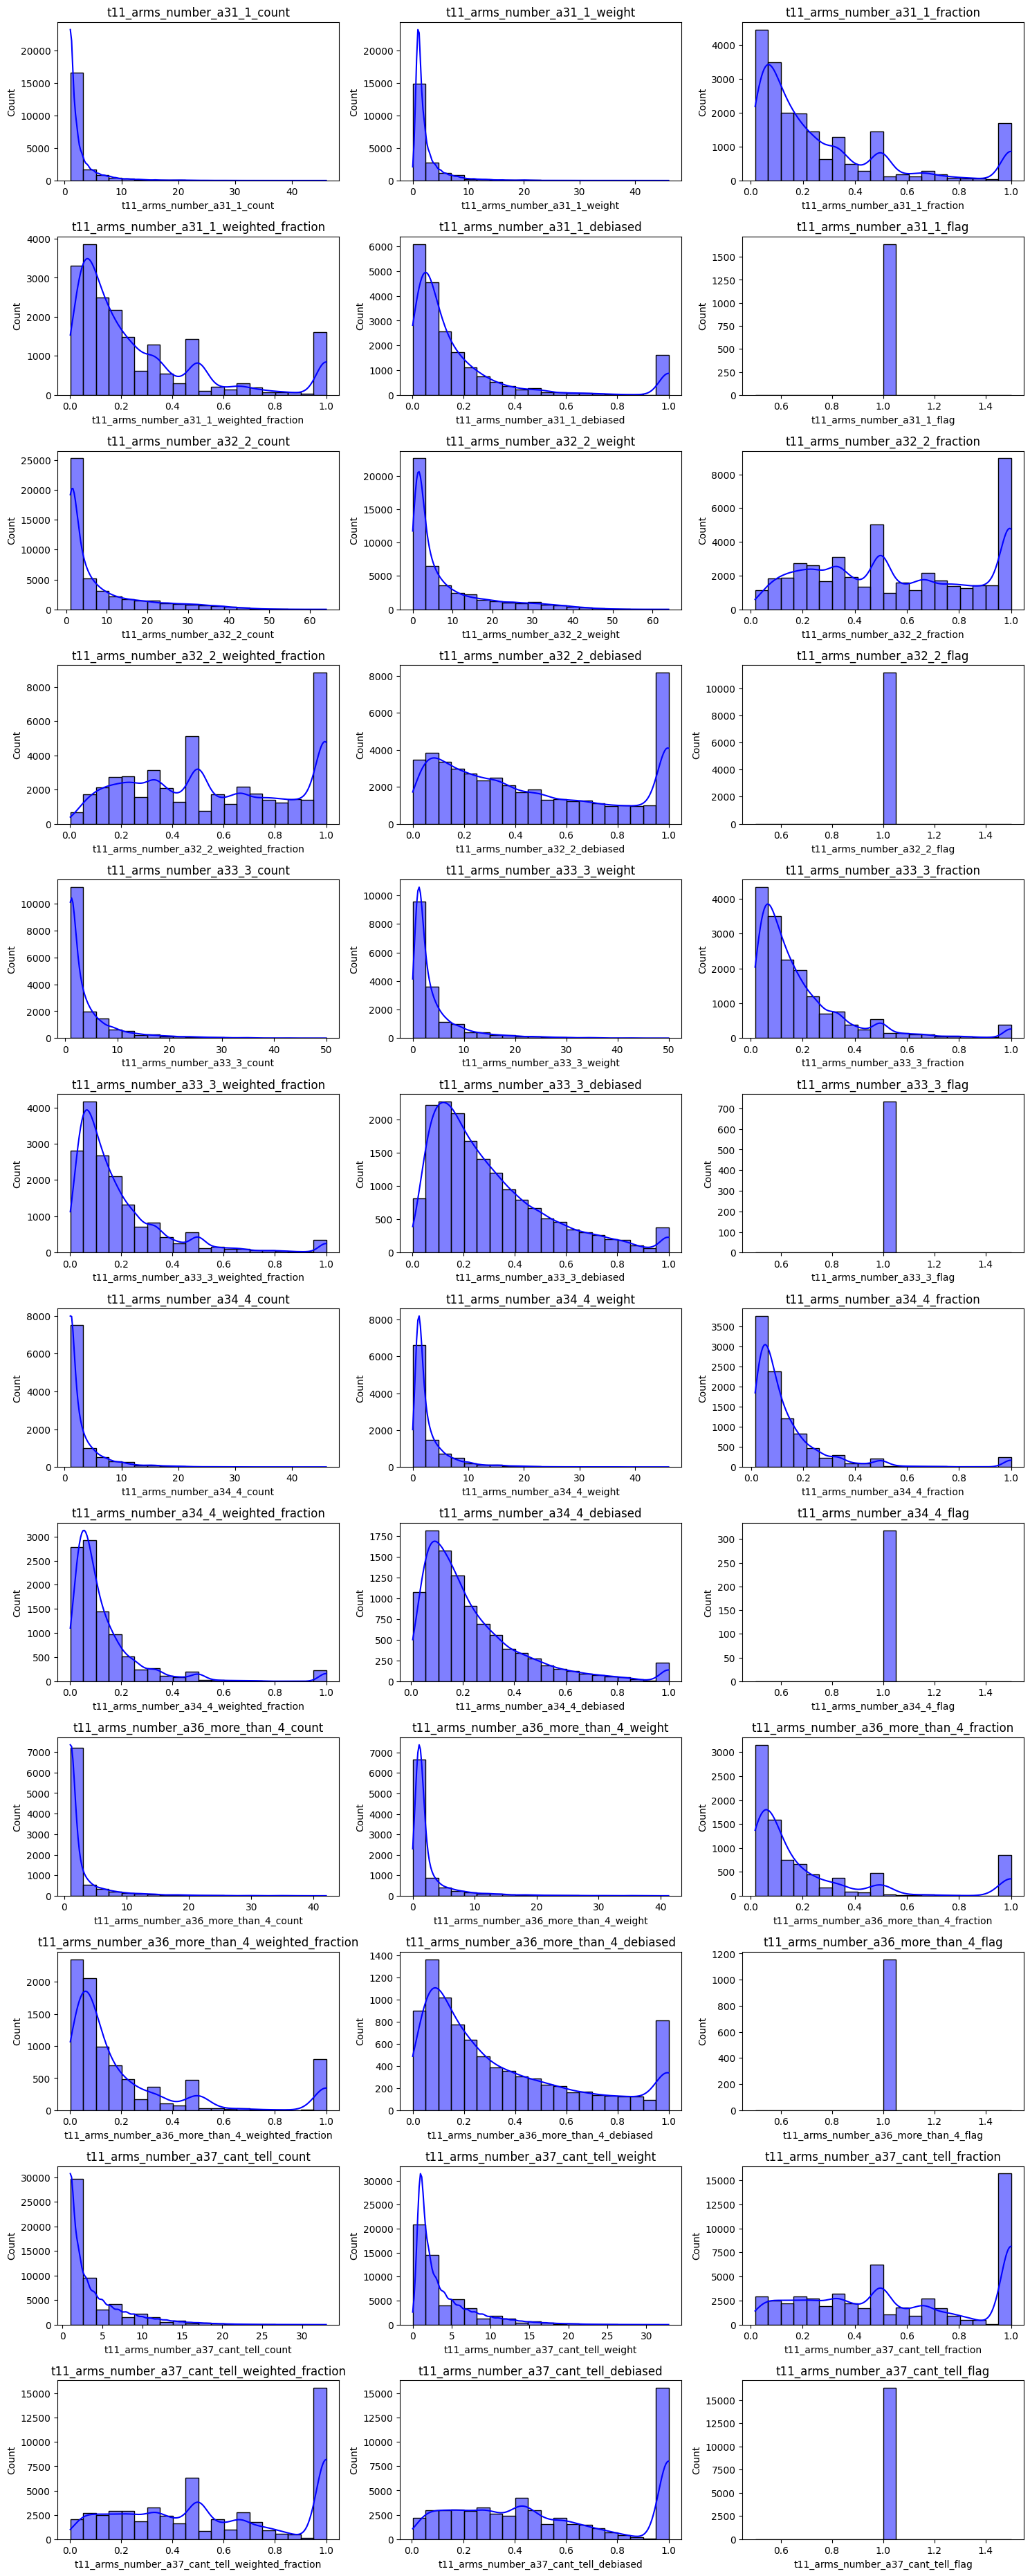

In [ ]:
# Let's plot histograms or density plots for key features starting with 't11_arms_number'
plt.figure(figsize=(15,40))
for i, col in enumerate(t11_columns, 1):
    plt.subplot(len(t11_columns)//3 + 1, 3, i)
    data = dataset[col][dataset[col] > 0]
    sns.histplot(data, kde=True, bins=20, color='blue')
    plt.title(col)
    plt.tight_layout()

plt.show()

Now these histograms are much more interesting.

7. Let's plot scatter plots for those variables, which have correlation higher than 0.7

In [48]:

high_corr_pairs = []
threshold = 0.7
for i in range(len(t11_corr.columns)):
    for j in range(i + 1, len(t11_corr.columns)):
        if abs(t11_corr.iloc[i, j]) > threshold:
            high_corr_pairs.append((t11_corr.columns[i], t11_corr.columns[j]))
t11_corr

t11_arms_number_a31_1_count  \
t11_arms_number_a31_1_count                                           1.000000   
t11_arms_number_a31_1_weight                                          0.999814   
t11_arms_number_a31_1_fraction                                        0.534030   
t11_arms_number_a31_1_weighted_fraction                               0.539122   
t11_arms_number_a31_1_debiased                                        0.428843   
t11_arms_number_a31_1_flag                                            0.098706   
t11_arms_number_a32_2_count                                           0.176547   
t11_arms_number_a32_2_weight                                          0.176513   
t11_arms_number_a32_2_fraction                                        0.091696   
t11_arms_number_a32_2_weighted_fraction                               0.092854   
t11_arms_number_a32_2_debiased                                        0.043797   
t11_arms_number_a32_2_flag                                           -0.061415   
t11_arms_number_a33_3_count                                           0.066740   
t11_arms_number_a33_3_weight                                          0.066671   
t11_arms_number_a33_3_fraction                                        0.048321   
t11_arms_number_a33_3_weighted_fraction                               0.049612   
t11_arms_number_a33_3_debiased                                        0.088873   
t11_arms_number_a33_3_flag                                           -0.016300   
t11_arms_number_a34_4_count                                           0.015064   
t11_arms_number_a34_4_weight                                          0.015025   
t11_arms_number_a34_4_fraction                                        0.000327   
t11_arms_number_a34_4_weighted_fraction                               0.000956   
t11_arms_number_a34_4_debiased                                        0.023425   
t11_arms_number_a34_4_flag                                           -0.012600   
t11_arms_number_a36_more_than_4_count                                 0.002797   
t11_arms_number_a36_more_than_4_weight                                0.002823   
t11_arms_number_a36_more_than_4_fraction                             -0.022185   
t11_arms_number_a36_more_than_4_weighted_fraction                    -0.021469   
t11_arms_number_a36_more_than_4_debiased                             -0.007792   
t11_arms_number_a36_more_than_4_flag                                 -0.025317   
t11_arms_number_a37_cant_tell_count                                   0.223140   
t11_arms_number_a37_cant_tell_weight                                  0.223130   
t11_arms_number_a37_cant_tell_fraction                               -0.016396   
t11_arms_number_a37_cant_tell_weighted_fraction                      -0.015505   
t11_arms_number_a37_cant_tell_debiased                               -0.024423   
t11_arms_number_a37_cant_tell_flag                                   -0.105739   

                                                   t11_arms_number_a31_1_weight  \
t11_arms_number_a31_1_count                                            0.999814   
t11_arms_number_a31_1_weight                                           1.000000   
t11_arms_number_a31_1_fraction                                         0.532203   
t11_arms_number_a31_1_weighted_fraction                                0.539079   
t11_arms_number_a31_1_debiased                                         0.428875   
t11_arms_number_a31_1_flag                                             0.098778   
t11_arms_number_a32_2_count                                            0.176504   
t11_arms_number_a32_2_weight                                           0.176469   
t11_arms_number_a32_2_fraction                                         0.091723   
t11_arms_number_a32_2_weighted_fraction                                0.092824   
t11_arms_number_a32_2_debiased                                         0.043785   
t11_arms_number_a32_

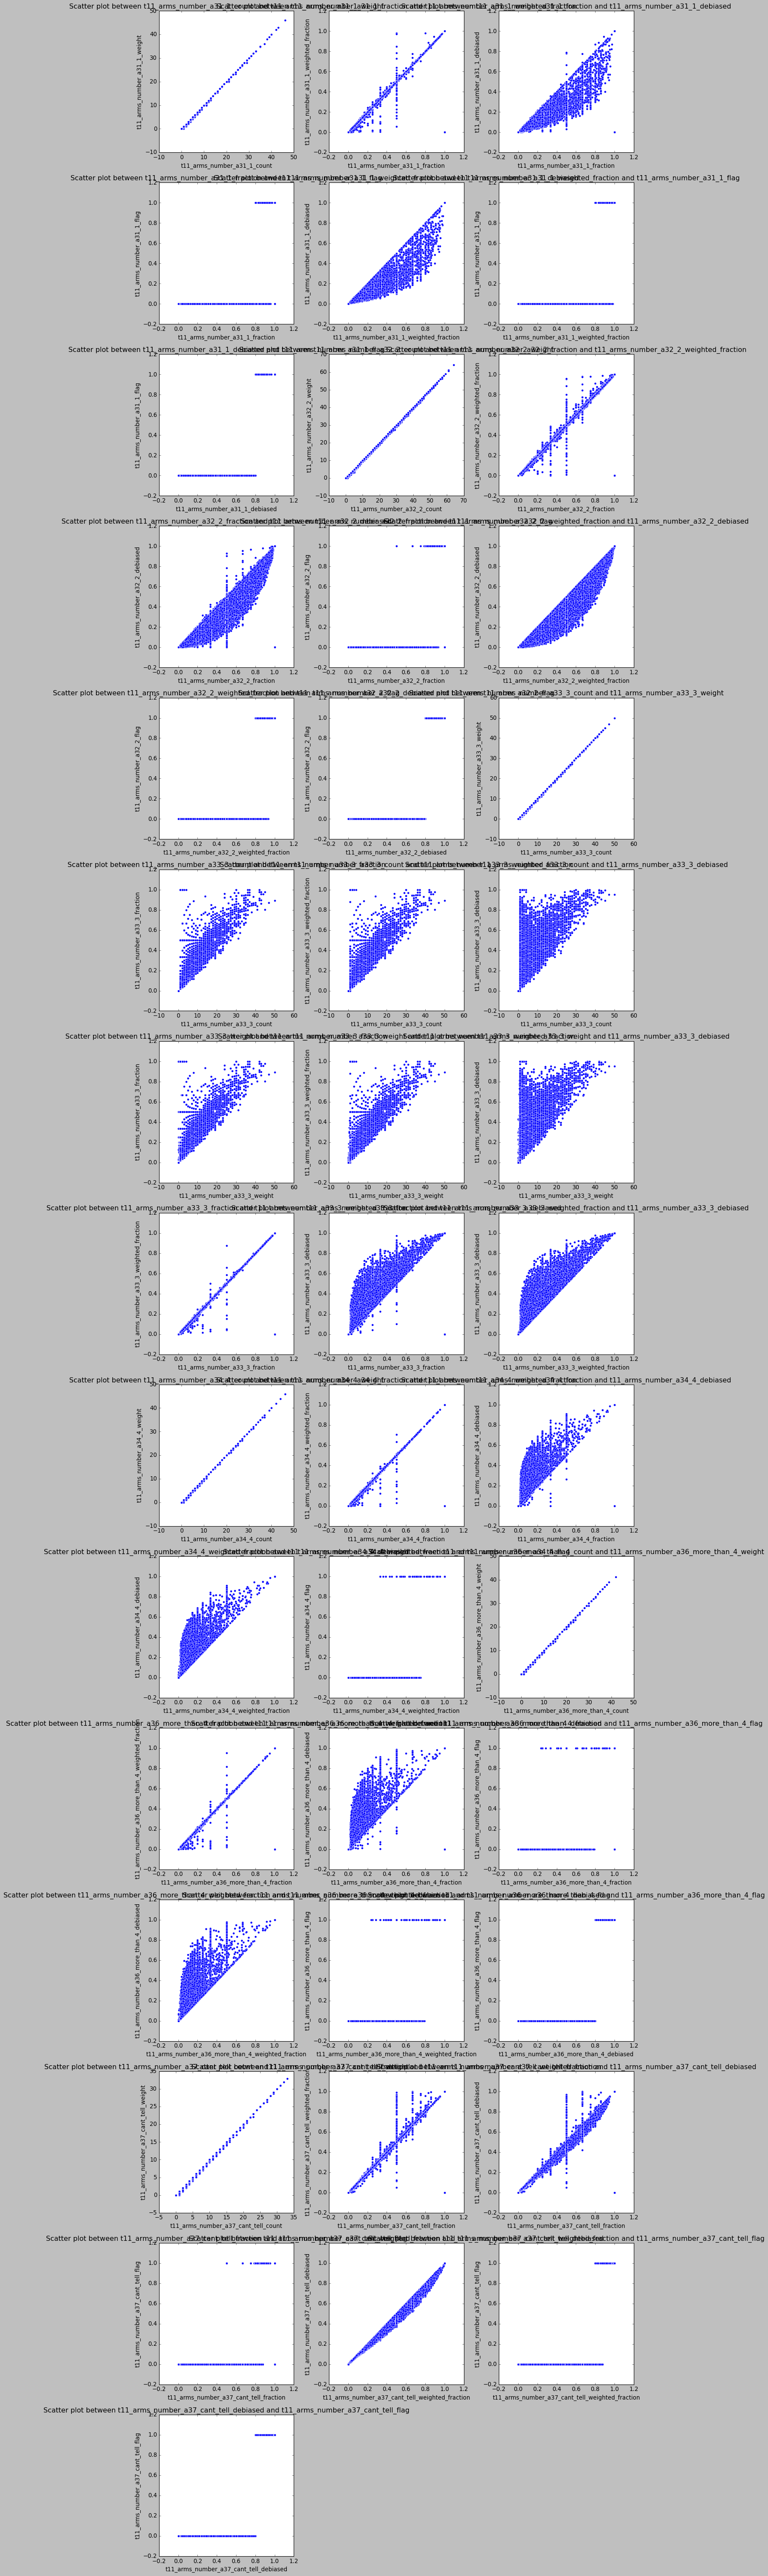

In [49]:
# Plot scatter plots for each pair
n_pairs = len(high_corr_pairs)
n_cols = 3
n_rows = int(np.ceil(n_pairs / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,5*n_rows))
axes = axes.flatten()

for i, (x, y) in enumerate(high_corr_pairs):
    sns.scatterplot(data=dataset, x=x, y=y, ax=axes[i])
    axes[i].set_title(f'Scatter plot between {x} and {y}')
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)
    axes[i].text(0.05, 0.95, f'Corr: {corr_value:.2f}', transform=axes[i].transAxes,
                 fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### IMAGE PROCESSING ###
Firstly let's recognize the data, which we are working with

Let's divide dataset with paths to our files into two smaller assets, which have similar size

In [3]:
train_csv_path = '../data/train_data.csv'
train_path_series = '../data/train_path_series.pkl'

val_csv_path = '../data/val_data.csv'
val_path_series = '../data/val_path_series.pkl'

JPG_Path_Series = pd.read_pickle(train_path_series)
Another_JPG_Path_Series=pd.read_pickle(val_path_series)

In [4]:
print(JPG_Path_Series.shape)

(117240,)


In [5]:
print(Another_JPG_Path_Series.shape)

(50246,)


Let's transform our images, by resizing them

In [6]:
Transformated_IMG = []

for X_Img in JPG_Path_Series:
    IMG = cv2.imread(X_Img,0)
    IMG = IMG[120:300,110:310]
    R_IMG = cv2.resize(IMG,(28,28))
    Transformated_IMG.append(R_IMG)

Before Transformation

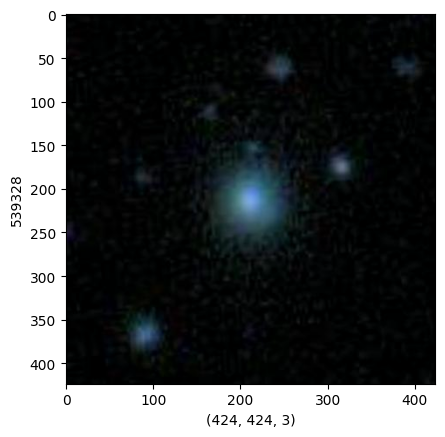

In [7]:
Example_IMG_0 = cv2.imread(JPG_Path_Series[0])
plt.xlabel(Example_IMG_0.shape)
plt.ylabel(Example_IMG_0.size)
plt.imshow(Example_IMG_0)

After transformation

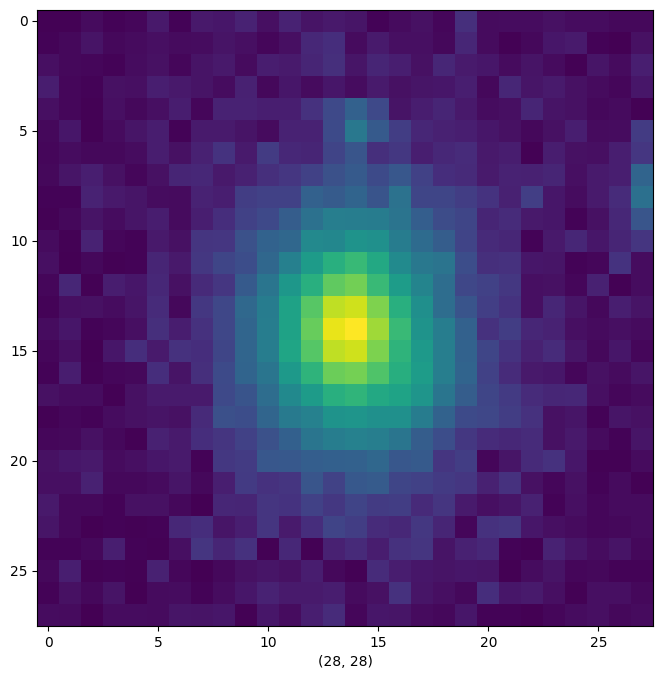

In [8]:
figure = plt.figure(figsize=(8,8))
plt.xlabel(Transformated_IMG[0].shape)
plt.imshow(Transformated_IMG[0])

We do the same things with Another_JPG_Path_Series dataset

In [9]:
Transformated_Another_IMG = []

for X_Img in Another_JPG_Path_Series:
    IMG = cv2.imread(X_Img,0)
    IMG = IMG[120:300,110:310]
    R_IMG = cv2.resize(IMG,(28,28))
    Transformated_Another_IMG.append(R_IMG)

Before transformation

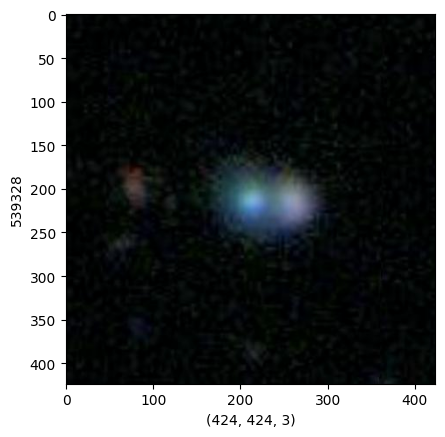

In [10]:
Example_IMG_Another_0 = cv2.imread(Another_JPG_Path_Series[0])
plt.xlabel(Example_IMG_Another_0.shape)
plt.ylabel(Example_IMG_Another_0.size)
plt.imshow(Example_IMG_Another_0)

After transformation

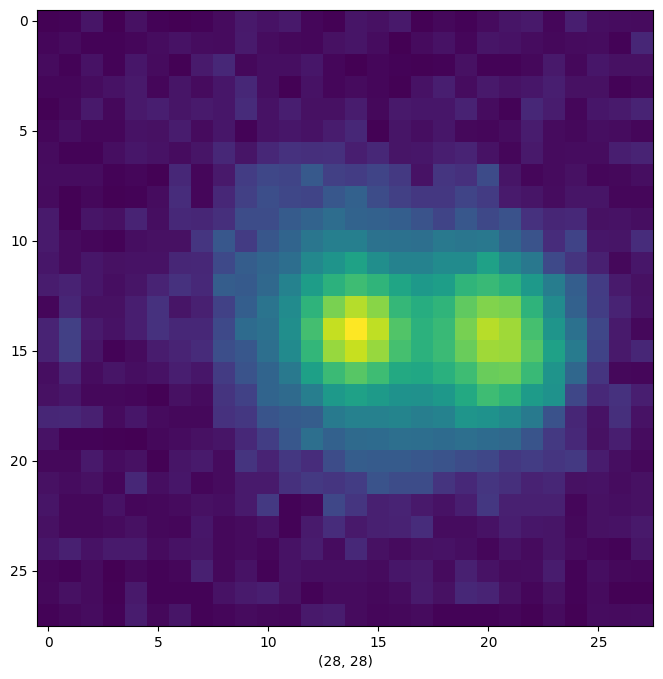

In [11]:
figure = plt.figure(figsize=(8,8))
plt.xlabel(Transformated_Another_IMG[0].shape)
plt.imshow(Transformated_Another_IMG[0])

Now let's divide our images by value 255. It would more appropriate for further analysis

In [12]:
Transformated_IMG_Scaled = []

for T_Img in Transformated_IMG:
    T_Img = T_Img / 255
    Transformated_IMG_Scaled.append(T_Img)

Text(0.5, 0, '(28, 28)')

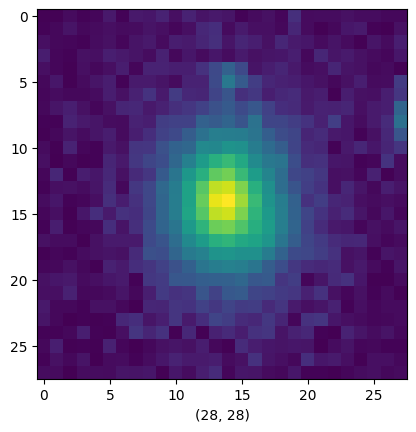

In [13]:
plt.imshow(Transformated_IMG_Scaled[0])
plt.xlabel(Transformated_IMG_Scaled[0].shape)

In [14]:
Another_Transformated_IMG_Scaled = []

for T_Img in Transformated_Another_IMG:
    T_Img = T_Img / 255
    Another_Transformated_IMG_Scaled.append(T_Img)

Text(0.5, 0, '(28, 28)')

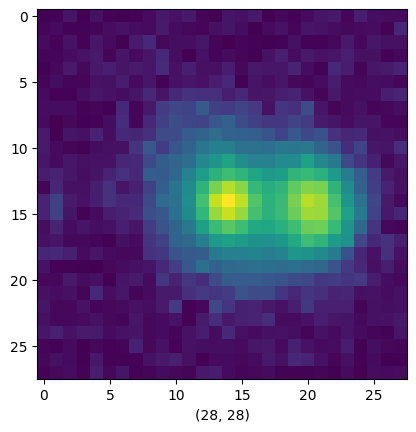

In [15]:
plt.imshow(Another_Transformated_IMG_Scaled[0])
plt.xlabel(Another_Transformated_IMG_Scaled[0].shape)

Let's put our transformed data into arrays 

In [16]:
N_Transformated_IMG_Scaled = np.array(Transformated_IMG_Scaled)
N_Another_Transformated_IMG_Scaled = np.array(Another_Transformated_IMG_Scaled)

In [17]:
X_Train = N_Transformated_IMG_Scaled
X_Test = N_Another_Transformated_IMG_Scaled

### AUTOENCODER ###

Part with encoder

In [18]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(500,activation="relu"))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(300,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

c:\Semestr 4\ML\Projekt 2\Galaxy_Zoo_2_repo\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
print(encoder.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 400)            │       200,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 25)             │         1,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 799,825 (3.05 MB)

 Trainable params: 799,825 (3.05 MB)

 Non-trainable params: 0 (0.00 B)

None


Now let's implement the decoder

In [20]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation="relu"))
decoder.add(Dense(100,activation="relu"))
decoder.add(Dense(200,activation="relu"))
decoder.add(Dense(300,activation="relu"))
decoder.add(Dense(400,activation="relu"))
decoder.add(Dense(500,activation="relu"))
decoder.add(Dense(784,activation="sigmoid"))
decoder.add(Reshape([28,28]))

c:\Semestr 4\ML\Projekt 2\Galaxy_Zoo_2_repo\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
print(decoder.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 300)            │        60,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 400)            │       120,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 500)            │       200,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 784)            │       392,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 800,584 (3.05 MB)

 Trainable params: 800,584 (3.05 MB)

 Non-trainable params: 0 (0.00 B)

None


Let's build AutoEncoder

In [22]:
AutoEncoder = Sequential([encoder,decoder])

In [23]:
print(AutoEncoder.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │       799,825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ ?                      │       800,584 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,600,409 (6.11 MB)

 Trainable params: 1,600,409 (6.11 MB)

 Non-trainable params: 0 (0.00 B)

None


We will use binary crossentropy as a loss function, rmsprop as optimizer and accuracy as a metric

In [24]:
AutoEncoder.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [25]:
AutoEncoder.fit(X_Train,X_Train,validation_data=(X_Test,X_Test),epochs=10)

Epoch 1/10
3664/3664 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - accuracy: 0.2511 - loss: 0.2913 - val_accuracy: 0.2608 - val_loss: 0.2698
Epoch 2/10
3664/3664 ━━━━━━━━━━━━━━━━━━━━ 34s 9ms/step - accuracy: 0.2610 - loss: 0.2696 - val_accuracy: 0.2604 - val_loss: 0.2693
Epoch 3/10
3664/3664 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - accuracy: 0.2605 - loss: 0.2689 - val_accuracy: 0.2579 - val_loss: 0.2670
Epoch 4/10
3664/3664 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.2578 - loss: 0.2666 - val_accuracy: 0.2570 - val_loss: 0.2669
Epoch 5/10
3664/3664 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - accuracy: 0.2594 - loss: 0.2663 - val_accuracy: 0.2739 - val_loss: 0.2662
Epoch 6/10
3664/3664 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - accuracy: 0.2931 - loss: 0.2653 - val_accuracy: 0.3055 - val_loss: 0.2646
Epoch 7/10
3664/3664 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - accuracy: 0.3085 - loss: 0.2640 - val_accuracy: 0.3139 - val_loss: 0.2640
Epoch 8/10
3664/3664 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - accuracy: 0.3132 - 

In [26]:
PRE_Img = AutoEncoder.predict(X_Test[:20])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


NORMAL


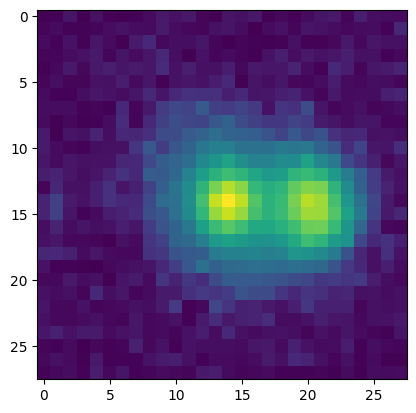

Auto Encoder


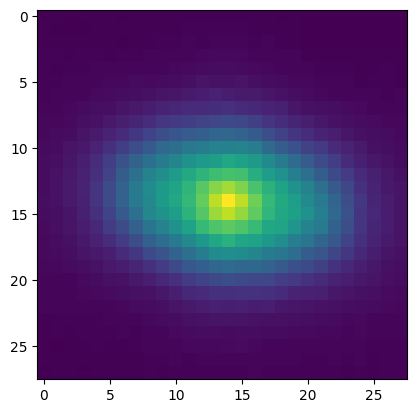

In [27]:
prediction_img = 0
print("NORMAL")
plt.imshow(X_Test[prediction_img])
plt.show()
print("Auto Encoder")
plt.imshow(PRE_Img[prediction_img])

We can clearly see that the above galaxy looks like an object, which belongs to eliptical galaxy class

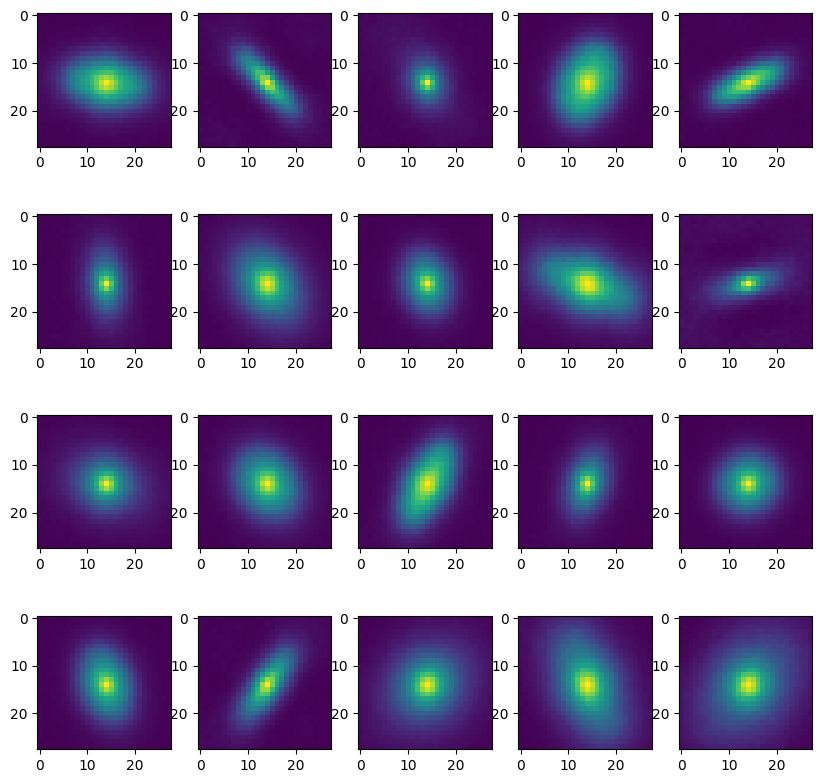

In [28]:
figure,axis = plt.subplots(nrows=4,ncols=5,figsize=(10,10))

for P_Image,ax in enumerate(axis.flat):
    ax.imshow(PRE_Img[P_Image])

Most of predicted objects belong to elyptical class

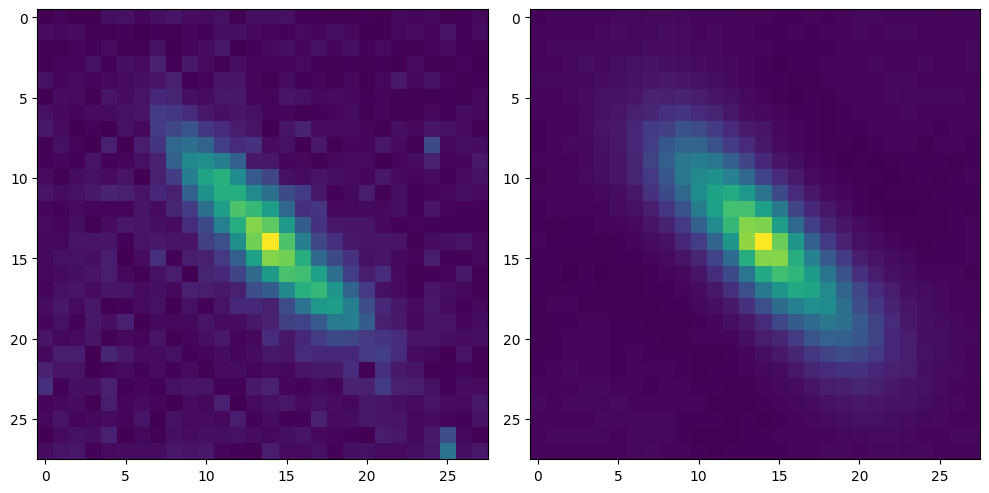

In [29]:
normal_IMG = X_Test[1]
After_AutoEncoder = PRE_Img[1]

IMGs_List_R = [normal_IMG,After_AutoEncoder]

figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(10,10))

for i, ax in enumerate(axis.flat):
    ax.imshow(IMGs_List_R[i])
plt.tight_layout()
plt.show()

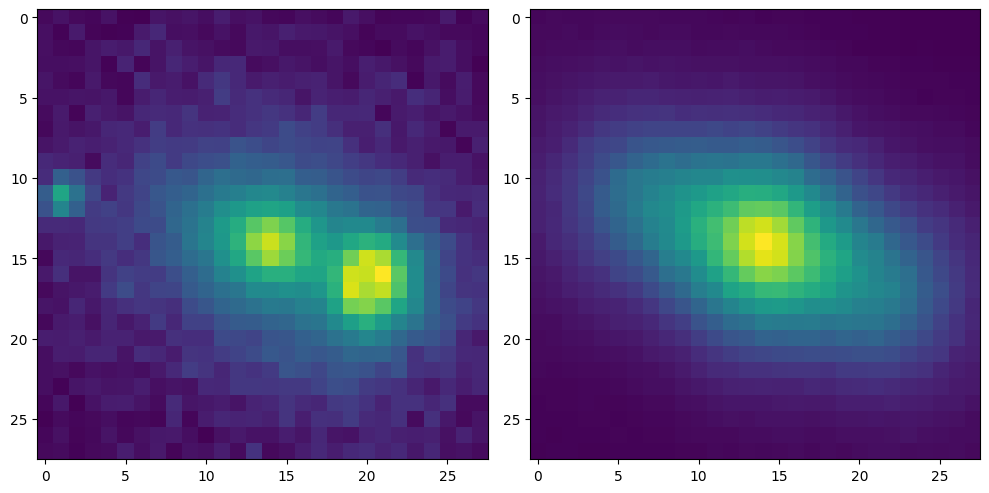

In [30]:
normal_IMG = X_Test[8]
After_AutoEncoder = PRE_Img[8]

IMGs_List_R = [normal_IMG,After_AutoEncoder]

figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(10,10))

for i, ax in enumerate(axis.flat):
    ax.imshow(IMGs_List_R[i])
plt.tight_layout()
plt.show()

Even though that most of the galaxies look pretty nice, we still face problems with some of the examples

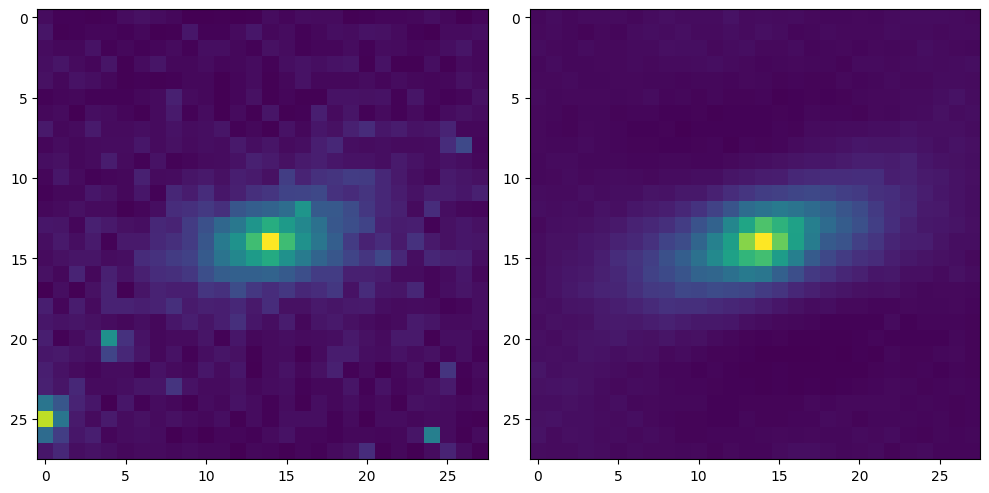

In [31]:
normal_IMG = X_Test[9]
After_AutoEncoder = PRE_Img[9]

IMGs_List_R = [normal_IMG,After_AutoEncoder]

figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(10,10))

for i, ax in enumerate(axis.flat):
    ax.imshow(IMGs_List_R[i])
plt.tight_layout()
plt.show()

Let's now focus on the removing of noise

In [32]:
S_Layer = GaussianNoise(0.2)

In [33]:
Noise_Exm = S_Layer(X_Test[:5],training=True)

Let's see how normal image compares to the noise one

NORMAL


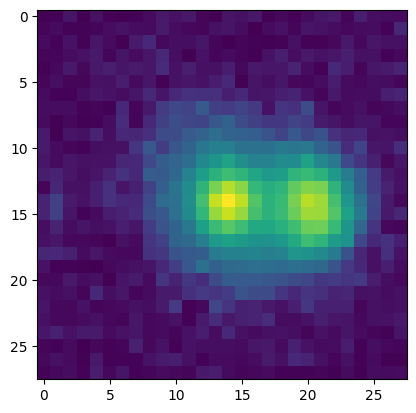

NOISE


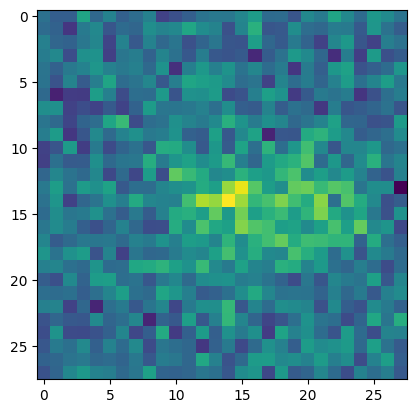

In [34]:
i = 0
print("NORMAL")
plt.imshow(X_Test[i])
plt.show()
print("NOISE")
plt.imshow(Noise_Exm[i])

NORMAL


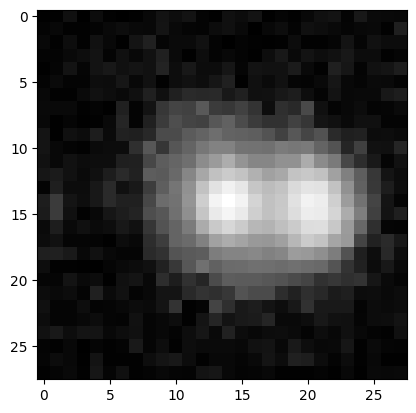

NOISE


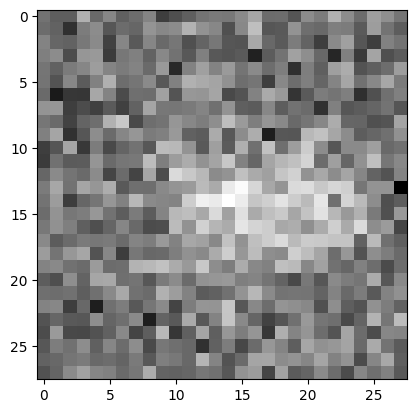

In [35]:
i = 0
print("NORMAL")
plt.imshow(X_Test[i],cmap="Greys_r")
plt.show()
print("NOISE")
plt.imshow(Noise_Exm[i],cmap="Greys_r")

Let's put encoder and decoder to our data

In [36]:
encoder_N = Sequential()
encoder_N.add(Flatten(input_shape=[28,28]))
encoder_N.add(GaussianNoise(0.3))
encoder_N.add(Dense(500,activation="relu"))
encoder_N.add(Dense(400,activation="relu"))
encoder_N.add(Dense(300,activation="relu"))
encoder_N.add(Dense(200,activation="relu"))
encoder_N.add(Dense(100,activation="relu"))
encoder_N.add(Dense(50,activation="relu"))
encoder_N.add(Dense(25,activation="relu"))

In [37]:
decoder_N = Sequential()
decoder_N.add(Dense(50,input_shape=[25],activation="relu"))
decoder_N.add(Dense(100,activation="relu"))
decoder_N.add(Dense(200,activation="relu"))
decoder_N.add(Dense(300,activation="relu"))
decoder_N.add(Dense(400,activation="relu"))
decoder_N.add(Dense(500,activation="relu"))
decoder_N.add(Dense(784,activation="sigmoid"))
decoder_N.add(Reshape([28,28]))

In [38]:
Removing_Noise_Model = Sequential([encoder_N,decoder_N])

In [39]:
Removing_Noise_Model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

Let's fit our model into the considered dataset

In [40]:
Removing_Noise_Model.fit(X_Train,X_Train,epochs=8)

Epoch 1/8
3664/3664 ━━━━━━━━━━━━━━━━━━━━ 36s 9ms/step - accuracy: 0.2515 - loss: 0.2925
Epoch 2/8
3664/3664 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - accuracy: 0.2619 - loss: 0.2715
Epoch 3/8
3664/3664 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - accuracy: 0.2622 - loss: 0.2703
Epoch 4/8
3664/3664 ━━━━━━━━━━━━━━━━━━━━ 33s 9ms/step - accuracy: 0.2607 - loss: 0.2702
Epoch 5/8
3664/3664 ━━━━━━━━━━━━━━━━━━━━ 32s 9ms/step - accuracy: 0.2612 - loss: 0.2685
Epoch 6/8
3664/3664 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - accuracy: 0.2604 - loss: 0.2684
Epoch 7/8
3664/3664 ━━━━━━━━━━━━━━━━━━━━ 32s 9ms/step - accuracy: 0.2618 - loss: 0.2685
Epoch 8/8
3664/3664 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - accuracy: 0.2739 - loss: 0.2675


In [41]:
Ten_N_IMG = S_Layer(X_Test[10:21],training=True)

In [42]:
Removing_N_IMG = Removing_Noise_Model(Ten_N_IMG)

NORMAL


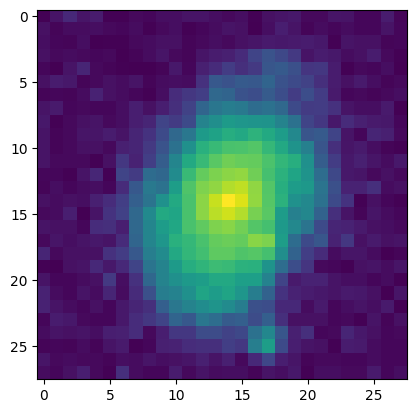

ADDED NOISE


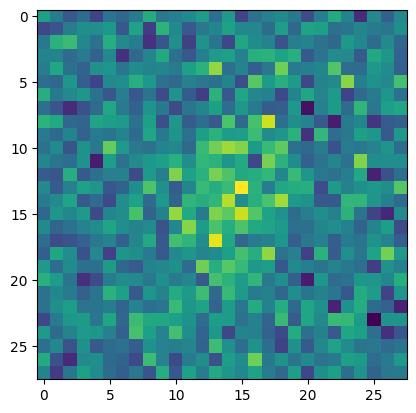

AFTER REMOVING MODEL


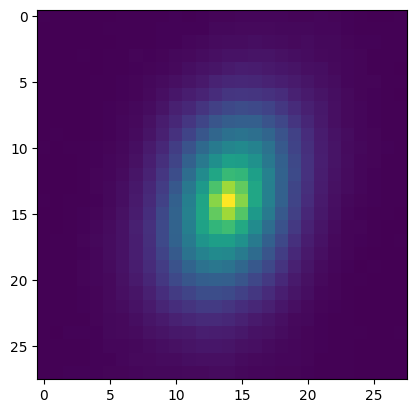

In [43]:
exp_n_img = 3

print("NORMAL")
plt.imshow(X_Test[exp_n_img])
plt.show()
print("ADDED NOISE")
plt.imshow(Ten_N_IMG[exp_n_img])
plt.show()
print("AFTER REMOVING MODEL")
plt.imshow(Removing_N_IMG[exp_n_img])
plt.show()

## FEATURE EXTRACTION

In our project we must, however, focus on the photos, not on the data associated with them. That's why we'll try to extract some features from the photos.

1. In the first attempt, we'll use pretrained CNN model called LGG16 which is considered one of the best in terms of image recognition.

In [ ]:
# Initializing the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=True)
base_model = Model(inputs=base_model.inputs, outputs=base_model.get_layer('fc2').output)

Let's perform this operation on a much smaller set reduced to only two columns: 'image_path' and 'asset_id'

In [ ]:
feature_extracting_dataset = dataset[['image_path', 'asset_id']]

In [ ]:
# Defining feature extraction function
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = base_model.predict(preprocessed_img)
    return features.flatten()


Now let's split our train_data into chunks containing 15000 rows. It is necessary because in other case the algorithm wouldn't work because of computational reasons. Then, however, we'll merge all these created files into one numpy array called 'features_array' and we'll save that array to the specific file. If you want, you can run the cell below, but executing time is estimated to be about eight hours.

In [ ]:
# Number of rows to process at a time
chunk_size = 15000

# Process and save the rows in chunks
start_index = 0
total_rows = len(feature_extracting_dataset)
chunk_num = 1  # Start numbering from 1

while start_index < total_rows:
    end_index = min(start_index + chunk_size, total_rows)
    current_chunk = feature_extracting_dataset.iloc[start_index:end_index]
    
    # Extract features for the current chunk
    extracted_features = current_chunk['image_path'].apply(extract_features)
    
    # Convert the features to a numpy array
    features_array = np.array(extracted_features.tolist())
    
    # Save the features array to a file
    np.save(f'features_array{chunk_num}.npy', features_array)
    
    print(f"Processed and saved chunk {chunk_num} from row {start_index} to {end_index-1}")
    
    # Update indices for the next chunk
    start_index = end_index
    chunk_num += 1

# List of file names to merge
file_names = [f'features_array{i}.npy' for i in range(1, chunk_num)]

# Initialize an empty list to hold the arrays
arrays_list = []

# Load each array and append it to the list
for file_name in file_names:
    array = np.load(file_name)
    arrays_list.append(array)

# Concatenate all arrays in the list into a single array
features_array = np.concatenate(arrays_list, axis=0)

# Save the merged array to a file
np.save('features_array.npy', features_array)

# Print the shape of the merged array to verify
print(f"Merged array shape: {features_array.shape}")

Now let's try to do PCA of our created variables to decrease size of the dataframe. We decided to perform PCA in a way that preserves around 90% of variance.

So firstly, we must find the number of components that meets the above condition

In [ ]:
features_array = np.load('../data/features_array.npy')

In [ ]:
# Performing PCA to retain 90% of the variance
pca = PCA(random_state=22)
pca.fit(features_array)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

In [ ]:
n_components_90

114

It turns out we can preserve 90% of variance while keeping only 114 columns. Let's perform this decomposition.

In [ ]:
# Performing PCA with the determined number of components
pca = PCA(n_components=114, random_state=22)
pca.fit(features_array)
x = pca.transform(features_array)

# Converting the transformed features to a DataFrame
features_df = pd.DataFrame(x)

# Adding prefixes to feature column names to avoid confusion with existing columns
features_df.columns = [f'feature_{i}' for i in range(features_df.shape[1])]

# Concatenating the original dataset with the features DataFrame
combined_df = pd.concat([feature_extracting_dataset.reset_index(drop=True), features_df.reset_index(drop=True)], axis=1)

# Saving the combined DataFrame to a CSV file
combined_df.to_csv('train_data_with_extracted_features.csv', index=False)

Let's read the dataset we've just created.

In [2]:
train_data_with_extracted_features = pd.read_csv('../data/train_data_with_extracted_features.csv')

In [ ]:
train_data_with_extracted_features

asset_id                       image_path  feature_0  feature_1  \
0         162421  ..\images_gz2\images\162421.jpg  -5.694521  -6.943976   
1          44722   ..\images_gz2\images\44722.jpg -16.842240   3.561687   
2         208280  ..\images_gz2\images\208280.jpg  12.882794  -0.318590   
3         155344  ..\images_gz2\images\155344.jpg -16.352491  -2.758194   
4         173142  ..\images_gz2\images\173142.jpg   7.467178  -4.410895   
...          ...                              ...        ...        ...   
117235    244781  ..\images_gz2\images\244781.jpg   4.029420 -12.066518   
117236     33317   ..\images_gz2\images\33317.jpg  -2.277440   9.616731   
117237    150527  ..\images_gz2\images\150527.jpg  11.779771  -5.081559   
117238    113768  ..\images_gz2\images\113768.jpg -14.540509  -2.218110   
117239     79325   ..\images_gz2\images\79325.jpg  11.975129   0.021684   

        feature_2  feature_3  feature_4  feature_5  feature_6  feature_7  ...  \
0       -6.571594   4.652028  10.041994   1.183449  -6.017553   4.298245  ...   
1        7.154723   4.552194   1.312322  -1.619450  -7.779319   3.503709  ...   
2       17.556614  12.656315  -1.117358  -4.942702   6.531599  -1.240206  ...   
3       11.018028   2.414773  -2.482307  -3.218006  -3.764668  -0.974701  ...   
4       -4.498577   9.241004  -2.143751   5.693013  -0.369158  -6.095777  ...   
...           ...        ...        ...        ...        ...        ...  ...   
117235  -9.963264  -1.556895  -5.986255  -1.081930   6.515405  -0.776894  ...   
117236 -10.392659  -3.626889   5.357701  -0.747928  -2.081262   8.974158  ...   
117237   3.989201  -0.606779   4.383240   2.383082  -5.612387 -10.050613  ...   
117238  -4.337345   1.309623  -2.073207   0.561409   0.447568   0.550849  ...   
117239  -4.152226   1.148786   1.975036   7.825089  -2.058075  -2.162210  ...   

        feature_104  feature_105  feature_106  feature_107  feature_108  \
0          0.421882     0.161334     0.021128     0.955200    -0.717609   
1         -0.076373    -1.751599    -0.153086     0.893463     1.277947   
2         -0.472377     0.930811     0.201928     0.783801    -0.754879   
3          0.221233     0.112618    -0.296652    -0.166244     0.370346   
4          0.133085     0.532890    -0.340872    -0.617953    -0.002272   
...             ...          ...          ...          ...          ...   
117235    -0.852246     0.183203    -1.499838     0.625114     1.352726   
117236    -0.330011    -0.219726     1.131084    -0.244702     0.482067   
117237     0.848411    -0.558782     0.095096    -0.464622     0.491228   
117238     1.188634    -0.328165     0.192664     0.100654     0.039230   
117239    -1.093011     0.007574     1.174715    -0.593554    -0.260647   

        feature_109  feature_110  feature_111  feature_112  feature_113  
0         -0.367347    -0.360769    -0.199149     1.296417    -0.473568  
1          0.859659     0.246811     1.005524    -1.207120    -1.161348  
2         -0.682415     0.351330     0.102233    -0.023515     0.135191  
3         -0.011493     0.359566    -0.084355     0.024555     0.450769  
4          0.180916    -0.045651    -0.286753    -0.456680     0.232272  
...             ...          ...          ...          ...          ...  
117235    -0.037090     0.272792    -0.426175    -0.059269    -0.110512  
117236     0.973127    -0.719593     0.156589    -0.374304     0.661740  
117237     1.220005    -0.524533    -0.111363    -0.957130     0.145768  
117238    -0.439141     0.720459    -0.643219    -0.175844     0.466739  
117239     0.248204     0.157478     0.593052    -0.145424    -0.151138  

[117240 rows x 116 columns]

Now let's see if KMeans model works for this data

In [56]:

def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores


In [ ]:
X = train_data_with_extracted_features.drop(columns=['asset_id', 'image_path'])

cluster_num_seq = range(2, 11)
silhouette_vec = count_clustering_scores(X, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

In [54]:
X_Train_flattened = X_Train.reshape(117240, 28*28)

print(X_Train_flattened.shape)

(117240, 784)


In [55]:
X_Test_flattened = X_Test.reshape(50246, 28*28)

print(X_Test_flattened.shape)

(50246, 784)


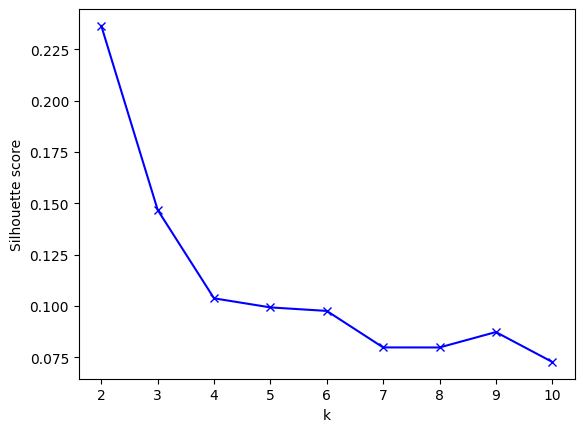

In [57]:
cluster_num_seq = range(2, 11) 
silhouette_vec = count_clustering_scores(X_Train_flattened, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

The Silhouette score shows that the results are the best when we create two clusters - it's unfortunately now what we expected.

Now let's try t-SNE method to visualize our dataframe containing 116 features

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.002s...
[t-SNE] Computed neighbors for 2000 samples in 0.055s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 2.765104
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.002937
[t-SNE] KL divergence after 1000 iterations: 2.742274


C:\Users\Mikolaj\AppData\Local\Temp\ipykernel_16636\1790833135.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['tsne-2d-one'] = z[:,0]
C:\Users\Mikolaj\AppData\Local\Temp\ipykernel_16636\1790833135.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['tsne-2d-two'] = z[:,1]


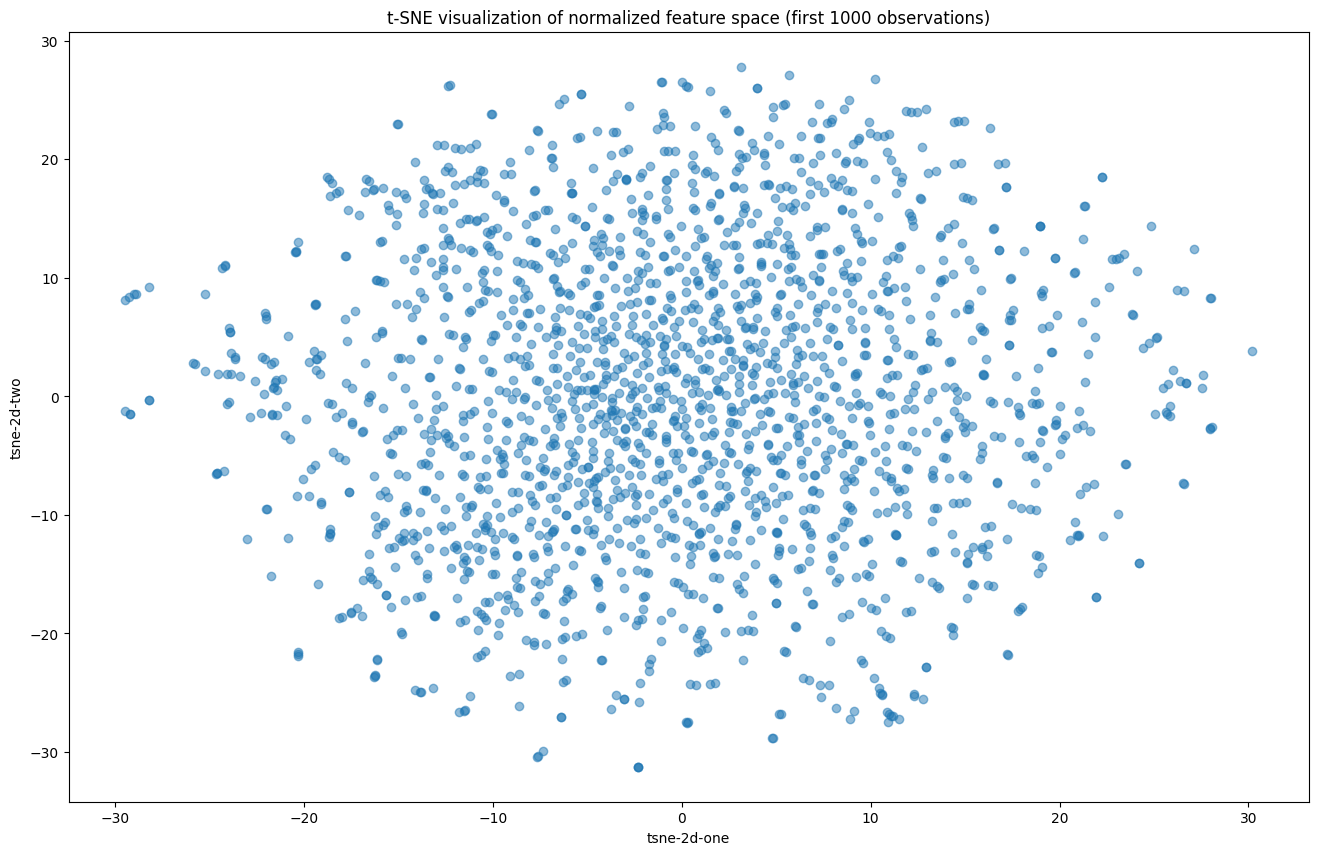

In [11]:

df = train_data_with_extracted_features

# Select the first 1000 observations
df_subset = df.iloc[:2000, :]

# Extract feature columns
features = df_subset.iloc[:, 2:]  # Adjust if necessary to select only feature columns

# Normalize the features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Apply t-SNE
tsne = TSNE(n_components=2, verbose=1)
z = tsne.fit_transform(features_normalized)

# Add t-SNE results to the DataFrame for visualization
df_subset['tsne-2d-one'] = z[:,0]
df_subset['tsne-2d-two'] = z[:,1]

# Plot the result
plt.figure(figsize=(16,10))
plt.scatter(
    x=df_subset['tsne-2d-one'], 
    y=df_subset['tsne-2d-two'],
    alpha=0.5
)
plt.title('t-SNE visualization of normalized feature space (first 1000 observations)')
plt.xlabel('tsne-2d-one')
plt.ylabel('tsne-2d-two')
plt.show()

Unfortunately, no clusters visible

Let's also see the distribution of these 114 numeric features.

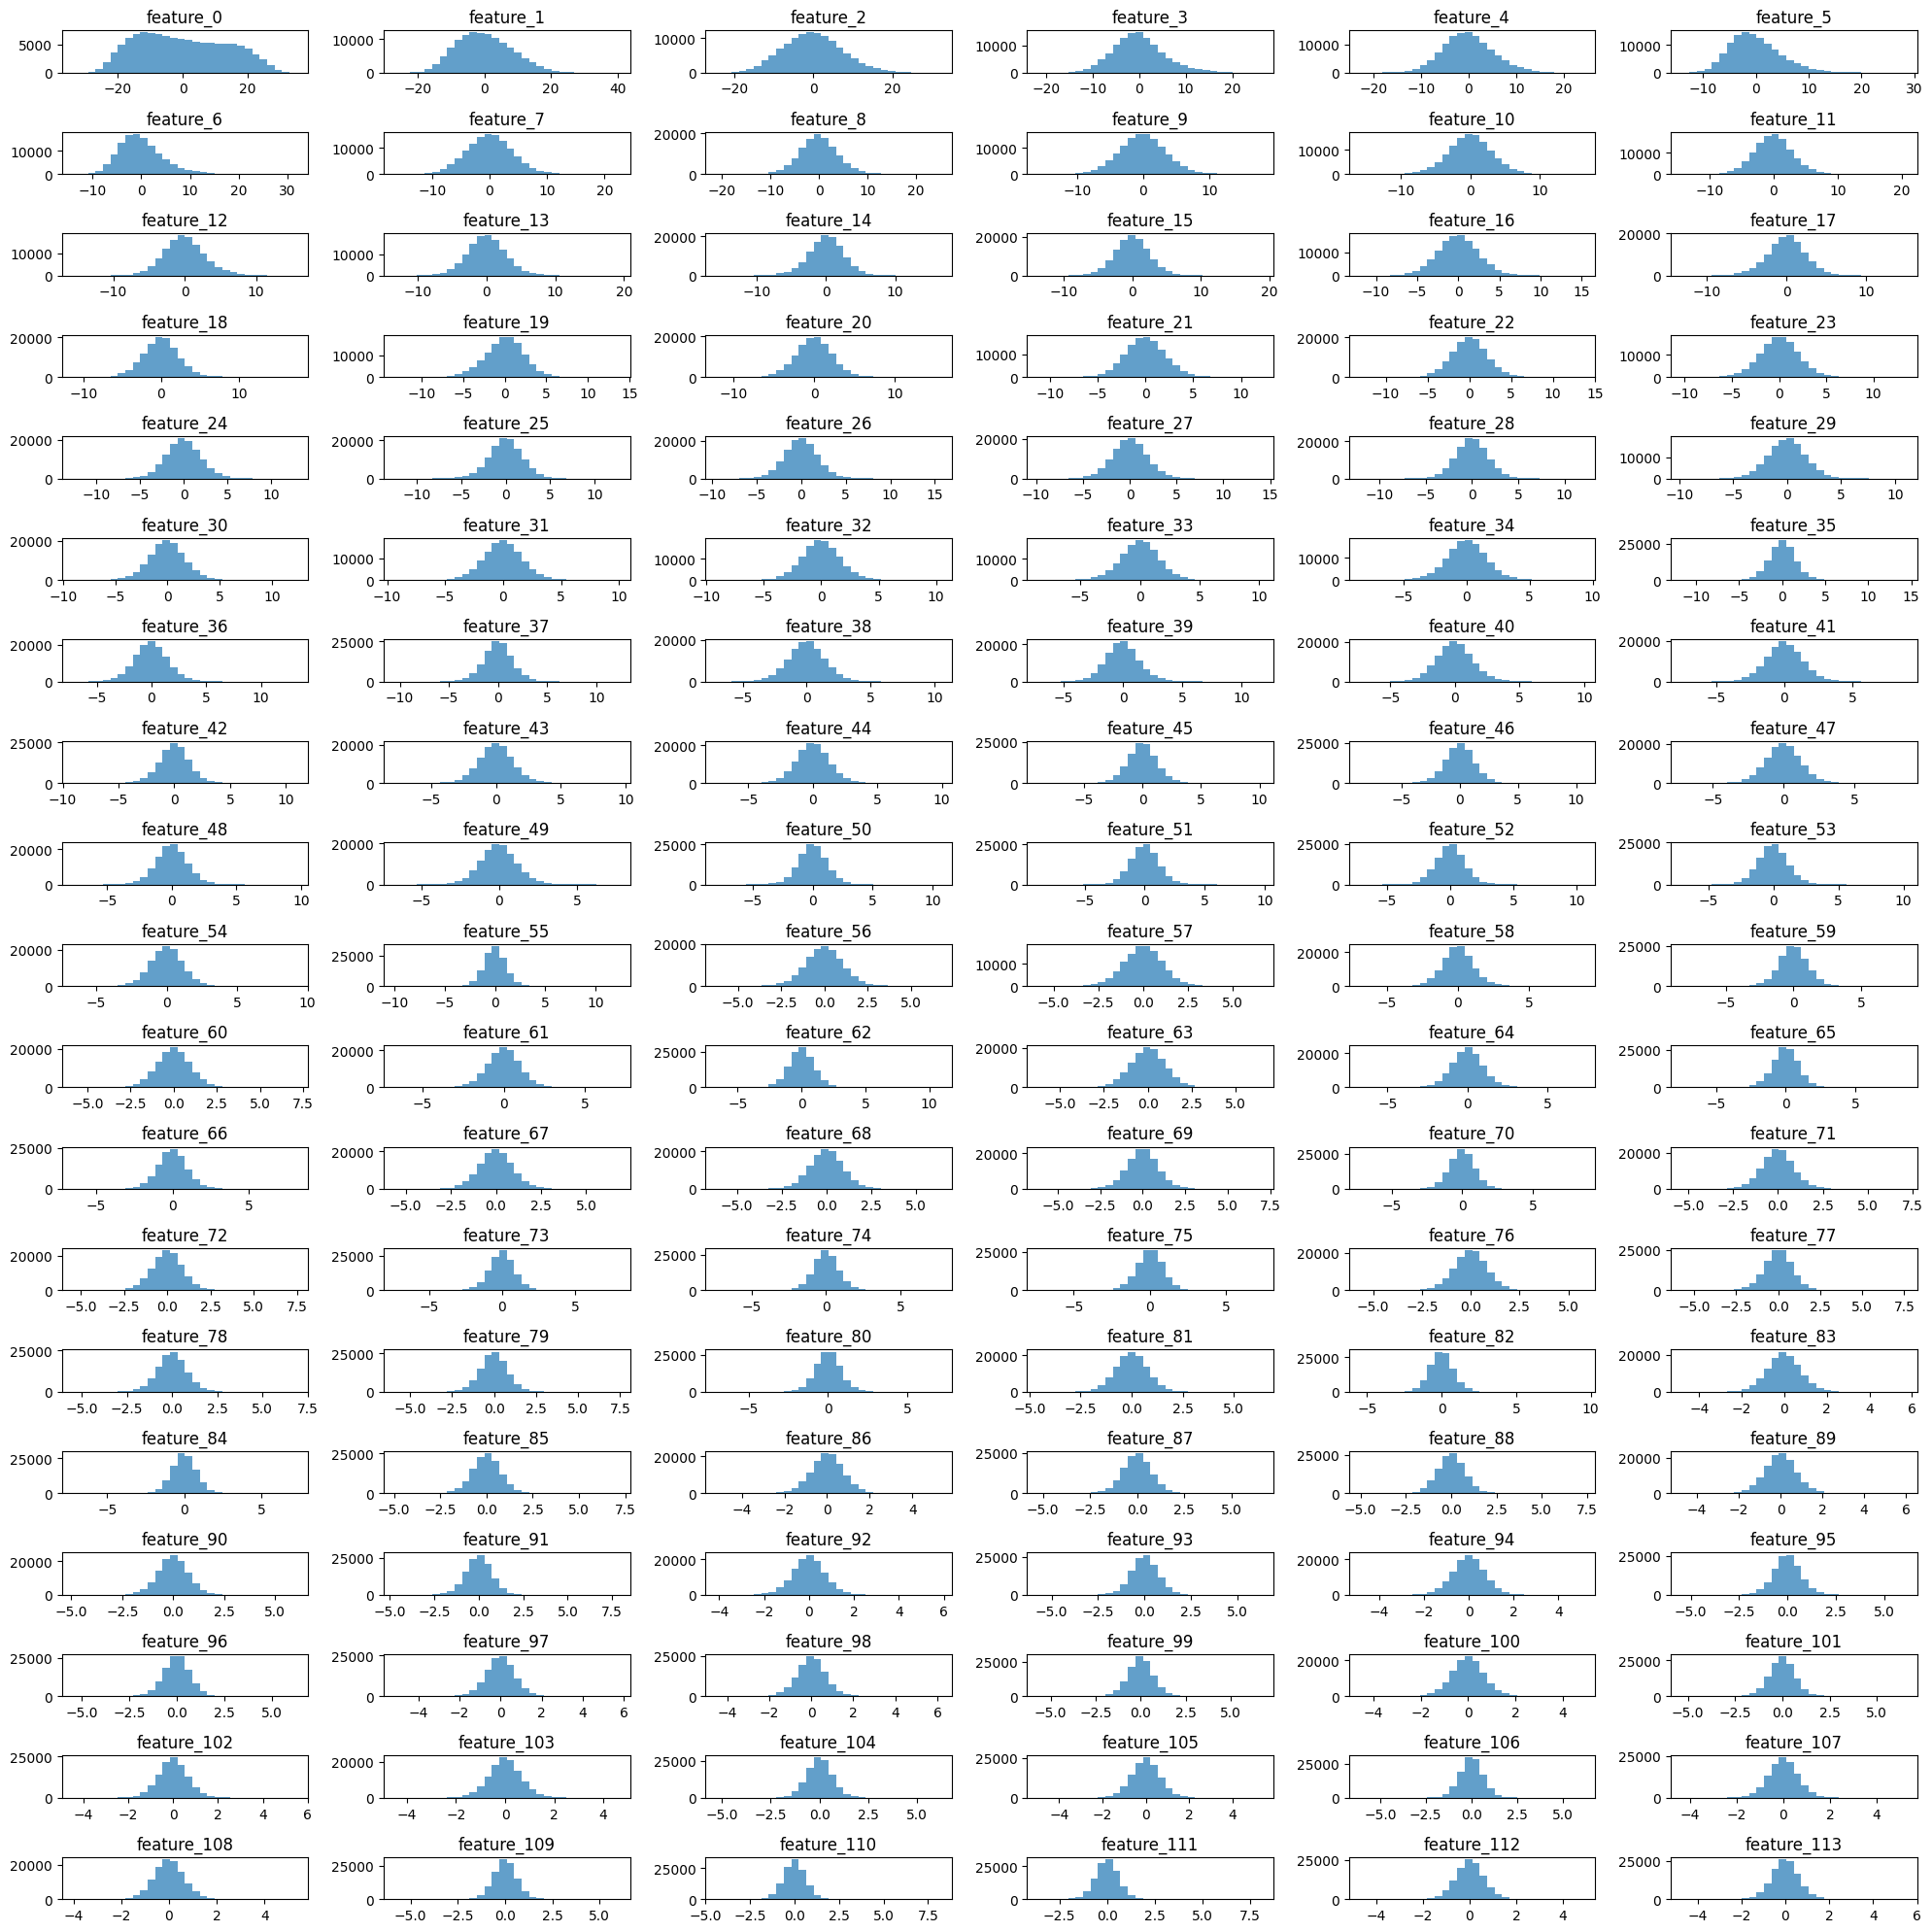

In [12]:
# Plot histograms for each feature
fig, axes = plt.subplots(nrows=19, ncols=6, figsize=(20, 20))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < 114:
        ax.hist(train_data_with_extracted_features.iloc[:, i + 2], bins=30, alpha=0.7)
        ax.set_title(f'feature_{i}')
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

It turns out nearly all of them have normal-like distribution

## Insights

1. We have performed EDA for features related to galaxies' morphologies. It shows some interesting behaviour, however this is only additional data. We should focus mostly on the photos of galaxies that we have.
2. We used AutoEncoder and RemovingNoiseModel to remove some noise from our photos. Maybe it'll bring some benefits in the next steps of our project.
3. We used LGG16 - convolutional neural network - to extract some features from the photos. This model created 4096 features. Then we performed PCA preserving 90% of variance which left us with 114 features. Nearly all of them show normal-like distribution
4. We tried t-SNE and K-Means model on the features extracted by LGG16 but the results are currently not satisfying. 